<div style="text-align:center; font-family: Times New Roman, serif;">
<span style="color:Orange; font-family: Times New Roman, serif; font-weight: bold;">
<span class="cm-header cm-header-1">
EARTHQUAKE DAMAGE PREDICTION </span>
</div>

-  Our task in this project to forecast how badly an individual house is damaged, given the information about its location, secondary usage, and the materials used to build the house in the first place. The damage grade of each house is stated as an integer variable between one and three.



#### The following pipeline is followed:


1. Problem Statement
2. Data
3. Evaluation Metrics
4. Domain Analysis
5. EDA
6. Data Pre-Processing
7. Features Selection
8. Modelling
9. Model Comparison Report
10. Hyperparameter Tuning
11. Experimentation
12. Conclusion

### Problem Statement

-  Prepare a complete data analysis report on the given data.
-  Create a predictive model in such a way that the objective is to predict
the ordinal variable “damage_grade”. This column presents the level of damage
grade affected by the earthquake.
-  Suggestions to the Seismologists to avoid earthquake event leading to
significant damage in many buildings

### 2.Dataset

-  The below dataset is used for both training and testing purpose.                
-  The dataset is from Kaggle.

### 3. Evaluation Metrics

-  By looking at the damage grade column, we understand that the project falls in  multiclass classification type.
-  Target column is having three unique values i.e., 1, 2 & 3.
-  The metrics that we are considering here is F1 Score.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,confusion_matrix

In [3]:
df1=pd.read_csv('train_values.csv')
pd.set_option('display.max_columns',None)
df1

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df2=pd.read_csv('train_labels.csv')
df2

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [5]:
data=pd.merge(df1,df2,on='building_id')
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


## Basic checks

In [6]:
list(data.columns)

['building_id',
 'geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_of

In [7]:
data.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

-  1 represents low damage
-  2 represents a medium amount of damage
-  3 represents almost complete destruction

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [9]:
data.dtypes.value_counts()

int64     32
object     8
dtype: int64

-  The data contains details about buildings/constructions damaged due to the earthquake occured in a region.

-  For that we are provided with geographical details, how many floor does the building had, age of construction, height, land surface, materials used for building the construction etc.

-  Here we have supervised data, the target is damage grade indicated as value 1, 2, & 3.

-  This comes under multiclass or multinomial classification where we need to predict one class from more than two classes.



In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0


-  Data is clean without missing values or nan, so we can proceed further for EDA.

In [11]:
data.nunique()

building_id                               260601
geo_level_1_id                                31
geo_level_2_id                              1414
geo_level_3_id                             11595
count_floors_pre_eq                            9
age                                           42
area_percentage                               84
height_percentage                             27
land_surface_condition                         3
foundation_type                                5
roof_type                                      3
ground_floor_type                              5
other_floor_type                               4
position                                       4
plan_configuration                            10
has_superstructure_adobe_mud                   2
has_superstructure_mud_mortar_stone            2
has_superstructure_stone_flag                  2
has_superstructure_cement_mortar_stone         2
has_superstructure_mud_mortar_brick            2
has_superstructure_c

In [12]:
data.shape

(260601, 40)

- There are 260601 rows and 40 columns in this dataset

In [13]:
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

-  There are no missing values.

## Domain Analysis

-  The dataset mainly consists of information on the buildings&#39; structure and their
legal ownership. Each row in the dataset represents a specific building in the
region that was hit by Gorkha earthquake.
-  There are 39 columns in this dataset, where the building_id column is a unique
and random identifier. The remaining 38 features are described in the section
below. 
-  Categorical variables have been obfuscated random lowercase ascii
characters. The appearance of the same character in distinct columns does not
imply the same original value.

Description
-  geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic
region in which building exists, from largest (level 1) to most specific sub-region
(level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567 
-  count_floors_pre_eq (type: int): number of floors in the building before the
earthquake.
-   age (type: int): age of the building in years.
-   area_percentage (type: int): normalized area of the building footprint.
-   height_percentage (type: int): normalized height of the building footprint.
-  land_surface_condition (type: categorical): surface condition of the land
where the building was built. Possible values: n, o, t.
-   foundation_type (type: categorical): type of foundation used while building.
Possible values: h, i, r, u, w.

-   roof_type (type: categorical): type of roof used while building. Possible
values: n, q, x.
-  ground_floor_type (type: categorical): type of the ground floor. Possible
values: f, m, v, x, z.
-   other_floor_type (type: categorical): type of constructions used in higher
than the ground floors (except of roof). Possible values: j, q, s, x.
-  position (type: categorical): position of the building. Possible values: j, o, s,

-   plan_configuration (type: categorical): building plan configuration. Possible
values: a, c, d, f, m, n, o, q, s, u.
-   has_superstructure_adobe_mud (type: binary): flag variable that indicates
if the superstructure was made of Adobe/Mud.
-   has_superstructure_mud_mortar_stone (type: binary): flag variable that
indicates if the superstructure was made of Mud Mortar - Stone.
-   has_superstructure_stone_flag (type: binary): flag variable that indicates if
the superstructure was made of Stone.
-   has_superstructure_cement_mortar_stone (type: binary): flag variable that
indicates if the superstructure was made of Cement Mortar - Stone.
-   has_superstructure_mud_mortar_brick (type: binary): flag variable that
indicates if the superstructure was made of Mud Mortar - Brick.
-   has_superstructure_cement_mortar_brick (type: binary): flag variable that
indicates if the superstructure was made of Cement Mortar - Brick.
-   has_superstructure_timber (type: binary): flag variable that indicates if the
superstructure was made of Timber.
-   has_superstructure_bamboo (type: binary): flag variable that indicates if
the superstructure was made of Bamboo.

-   has_superstructure_rc_non_engineered (type: binary): flag variable that
indicates if the superstructure was made of non-engineered reinforced concrete.
-   has_superstructure_rc_engineered (type: binary): flag variable that
indicates if the superstructure was made of engineered reinforced concrete.
-   has_superstructure_other (type: binary): flag variable that indicates if the
superstructure was made of any other material.
-   legal_ownership_status (type: categorical): legal ownership status of the
land where building was built. Possible values: a, r, v, w.
-    count_families (type: int): number of families that live in the building.
-  has_secondary_use (type: binary): flag variable that indicates if the
building was used for any secondary purpose.
-   has_secondary_use_agriculture (type: binary): flag variable that indicates
if the building was used for agricultural purposes.
-   has_secondary_use_hotel (type: binary): flag variable that indicates if the
building was used as a hotel.
-   has_secondary_use_rental (type: binary): flag variable that indicates if the
building was used for rental purposes.
-   has_secondary_use_institution (type: binary): flag variable that indicates if
the building was used as a location of any institution.
-   has_secondary_use_school (type: binary): flag variable that indicates if
the building was used as a school.
-   has_secondary_use_industry (type: binary): flag variable that indicates if
the building was used for industrial purposes.
-   has_secondary_use_health_post (type: binary): flag variable that indicates
if the building was used as a health post.
-   has_secondary_use_gov_office (type: binary): flag variable that indicates
if the building was used fas a government office.

-   has_secondary_use_use_police (type: binary): flag variable that indicates
if the building was used as a police station.
-   has_secondary_use_other (type: binary): flag variable that indicates if the
building was secondarily used for other purposes.


## Exploratory Data Analysis

In [14]:
data.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

- As we have three classes in target we plot these damage_grade 

Text(0, 0.5, 'Count')

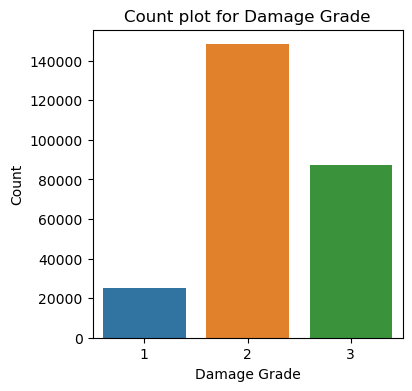

In [15]:
plt.figure(figsize=(4,4))

ax = sns.countplot(x="damage_grade", data=data)
ax.set_title("Count plot for Damage Grade")
ax.set_xlabel("Damage Grade")
ax.set_ylabel("Count")

- 1 represents low damage
- 2 represents a medium amount of damage
- 3 represents almost complete destruction


-  From this plot, it is easy to see that our dataset is very imbalanced. The reason why this dataset is imbalanced could be due to the fact that the data was collected after the 2015 Nepal's Earthquake, and it is very likely that the damage grade of the buildings is highly correlated to the intensity of the earthquake. It is important to mention that decision trees and random forests are extremely sensitive to imbalanced data.
-  Damage category 2 & 3 are higher than 1


-  For easy understanding purpose, we are dividing the columns into categorical,binary and continuous columns.

### Categorical features

In [16]:
categorical_col = []
for column in data.columns:#for loop to acess columns form dataset
    if data[column].dtype == object and len(data[column].unique()) <= 50:#checking datatype whether datatype is object/string and number of unique label in the columns less than 50 
        categorical_col.append(column)#appending those columns in the list who statisfy the condition 
        print(f"{column} : {data[column].unique()}")#output
        print("====================================")

land_surface_condition : ['t' 'o' 'n']
foundation_type : ['r' 'w' 'i' 'u' 'h']
roof_type : ['n' 'q' 'x']
ground_floor_type : ['f' 'x' 'v' 'z' 'm']
other_floor_type : ['q' 'x' 'j' 's']
position : ['t' 's' 'j' 'o']
plan_configuration : ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
legal_ownership_status : ['v' 'a' 'r' 'w']


### Binary features

In [17]:
bin_cols = data.columns[data.columns.str.startswith('has')]
print(bin_cols)

Index(['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')


### continuous features

In [18]:
cont_col =data[['geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area_percentage','height_percentage','count_families','count_floors_pre_eq']]
cont_col

,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,count_families,count_floors_pre_eq
0,6,487,12198,30,6,5,1,2
1,8,900,2812,10,8,7,1,2
2,21,363,8973,10,5,5,1,2
3,22,418,10694,10,6,5,1,2
4,11,131,1488,30,8,9,1,3
...,...,...,...,...,...,...,...,...
260596,25,1335,1621,55,6,3,1,1
260597,17,715,2060,0,6,5,1,2
260598,17,51,8163,55,6,7,1,3
260599,26,39,1851,10,14,6,1,2


### Univariate Analysis

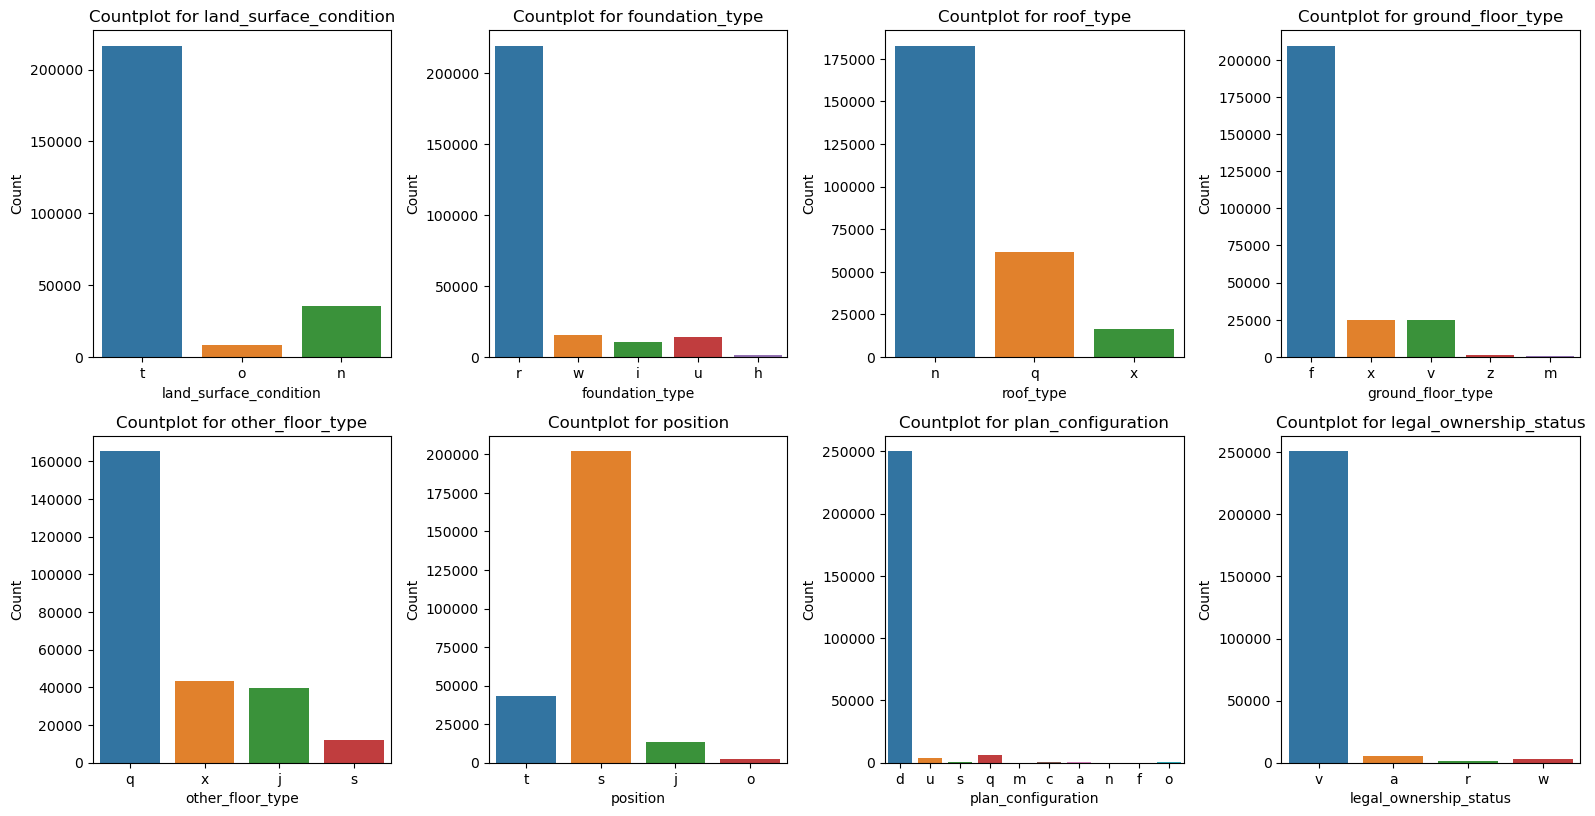

In [19]:
plt.figure(figsize=(16, 20))

for i, feature in enumerate(categorical_col):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=feature, data=data)
    plt.title(f"Countplot for {feature}")
    plt.ylabel("Count")

plt.tight_layout()


- most of the datapoints found for "t" in land_surface_condition compared with "o" & "n".
- most of the datapoints found for 'r' in foundation_type compared with all others & very less datapoints for 'h'.
- most of the datapoints found for 'n' in roof_type.
- most of the datapoints found for 'f' in ground_floor_type compared with remaining datapoints.
- most of the datapoints found for 'q' in other_floor_type 
- most of the datapoints found for 's' in position of building.
- most of the datapoints found for 'd' in plan_configuration, remaining all have veryless.
- most of the datapoints found for 'v' in legal_ownership_status, remaining all have very less

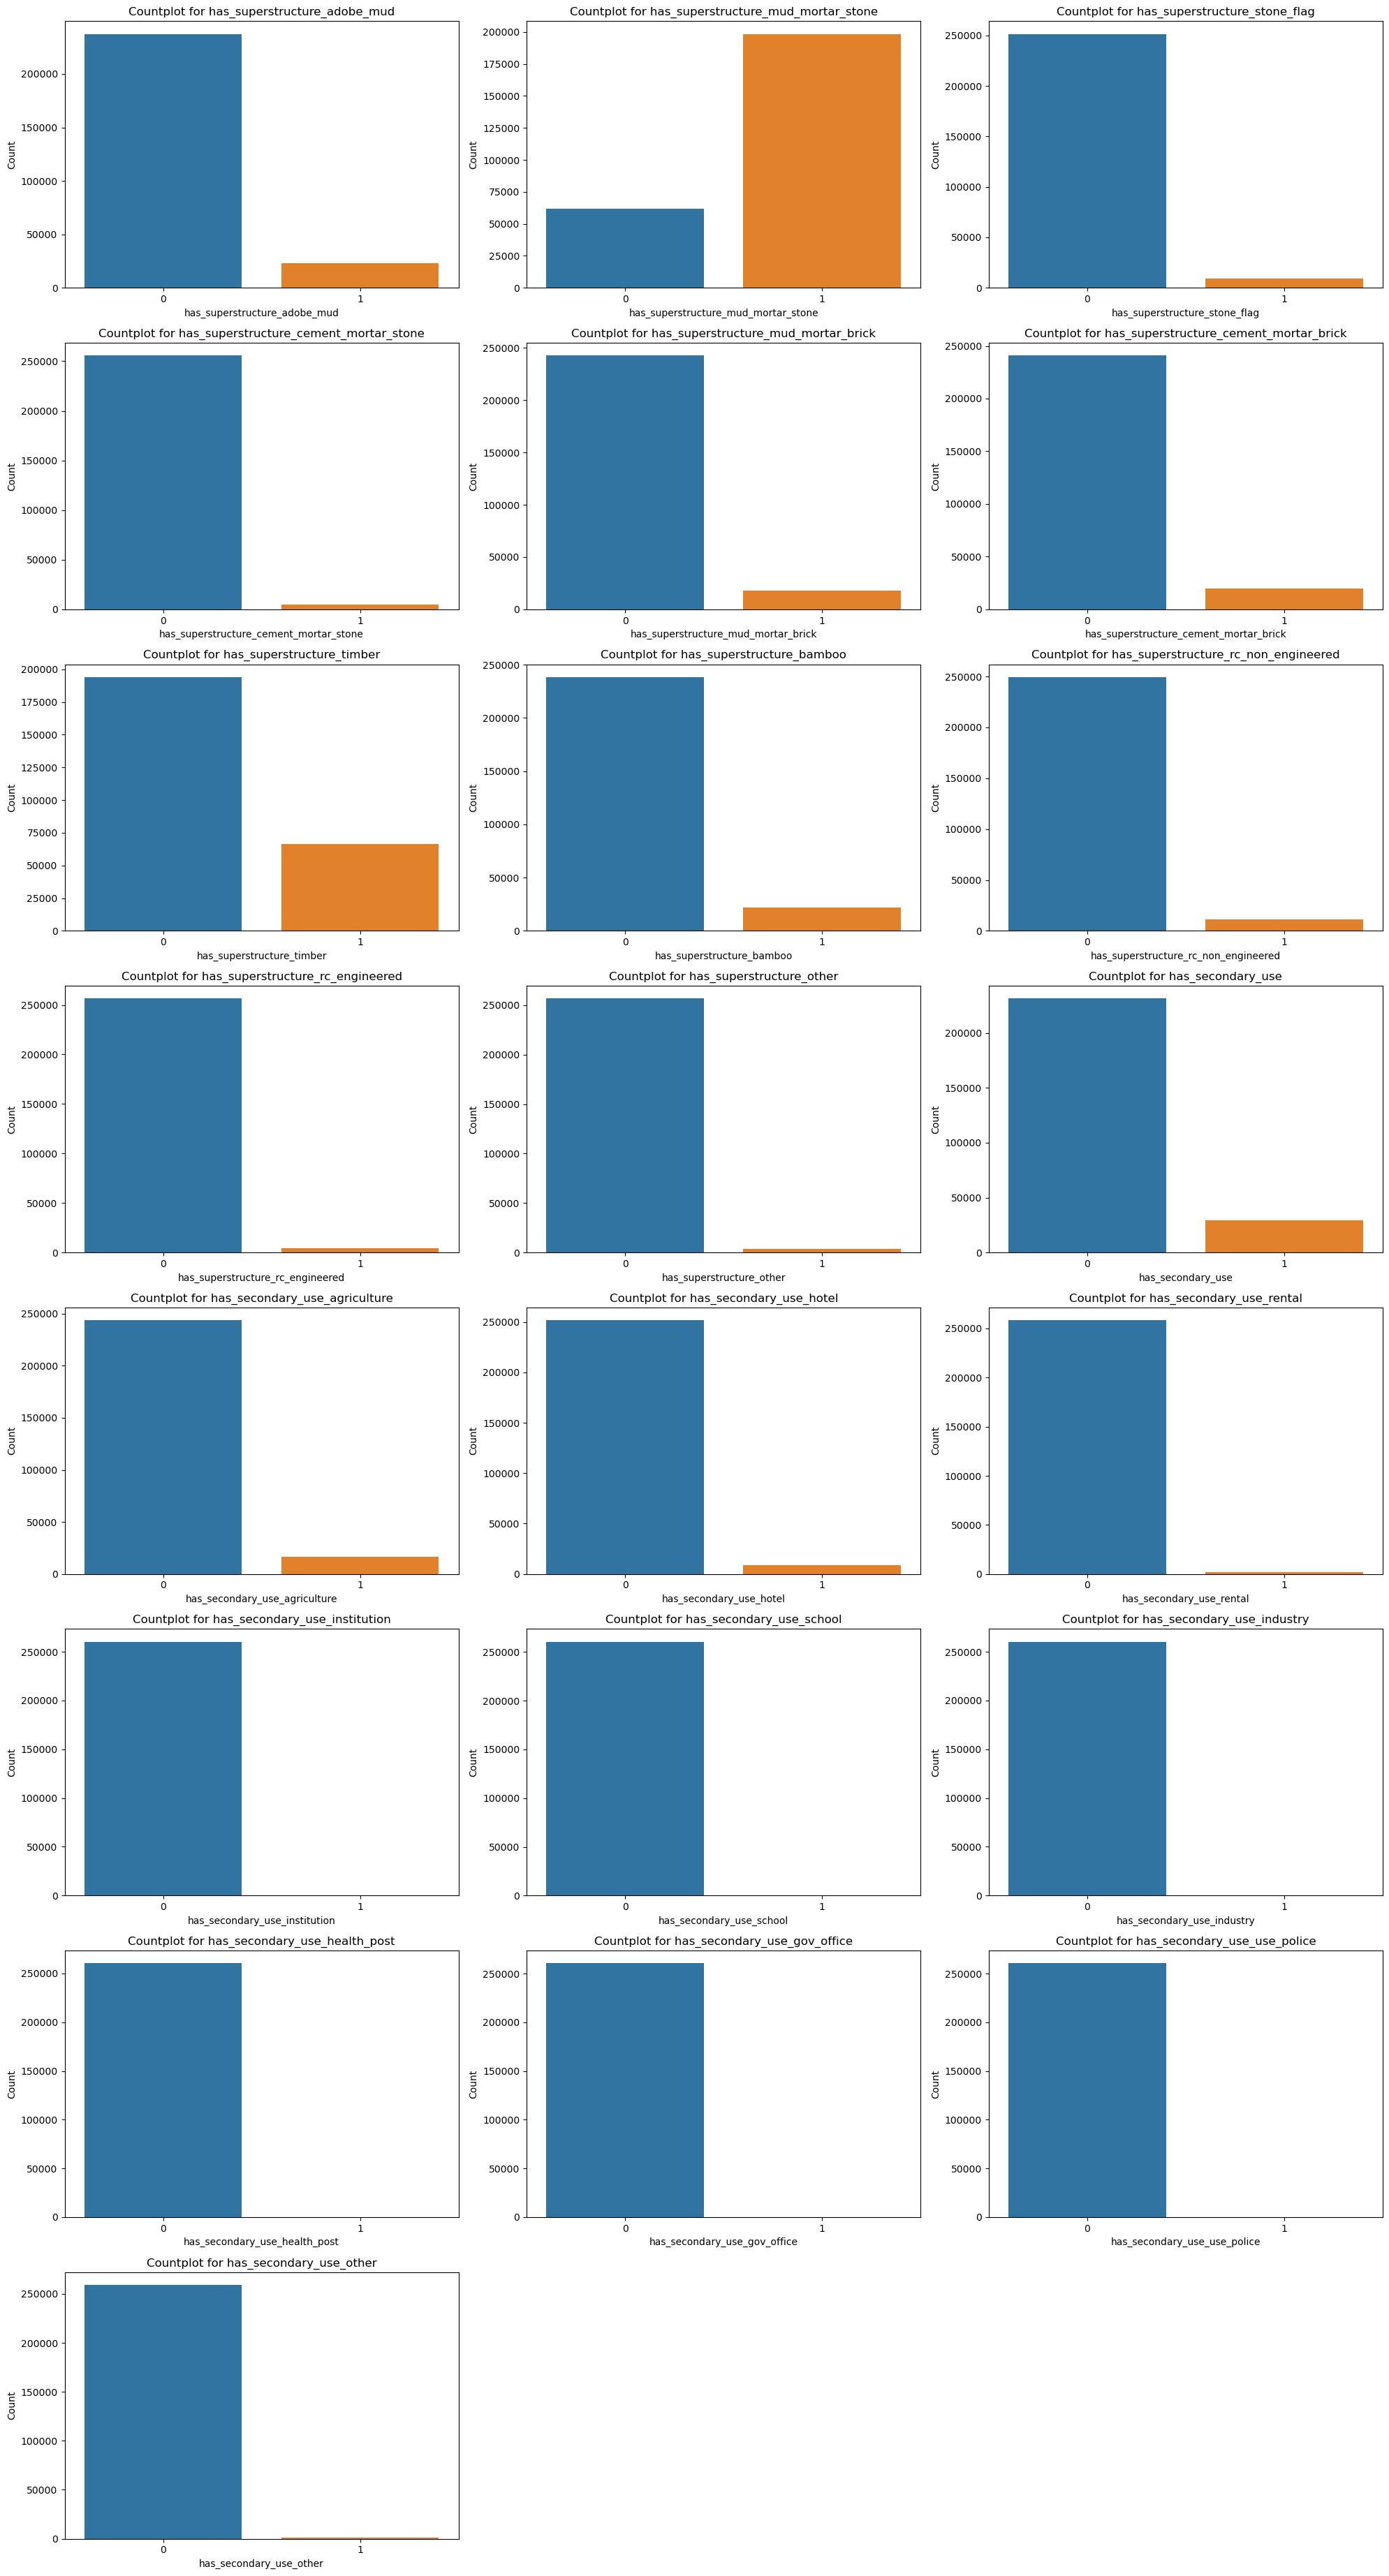

In [20]:
plt.figure(figsize=(20, 37))

for i, feature in enumerate(bin_cols):
    plt.subplot(8, 3, i+1)
    sns.countplot(x=feature, data=data)
    plt.title(f"Countplot for {feature}")
    plt.ylabel("Count")

plt.tight_layout()


- except for 'has_superstructure_mud_motor_stone', for all binary features almost most of the datapoints found for 0 

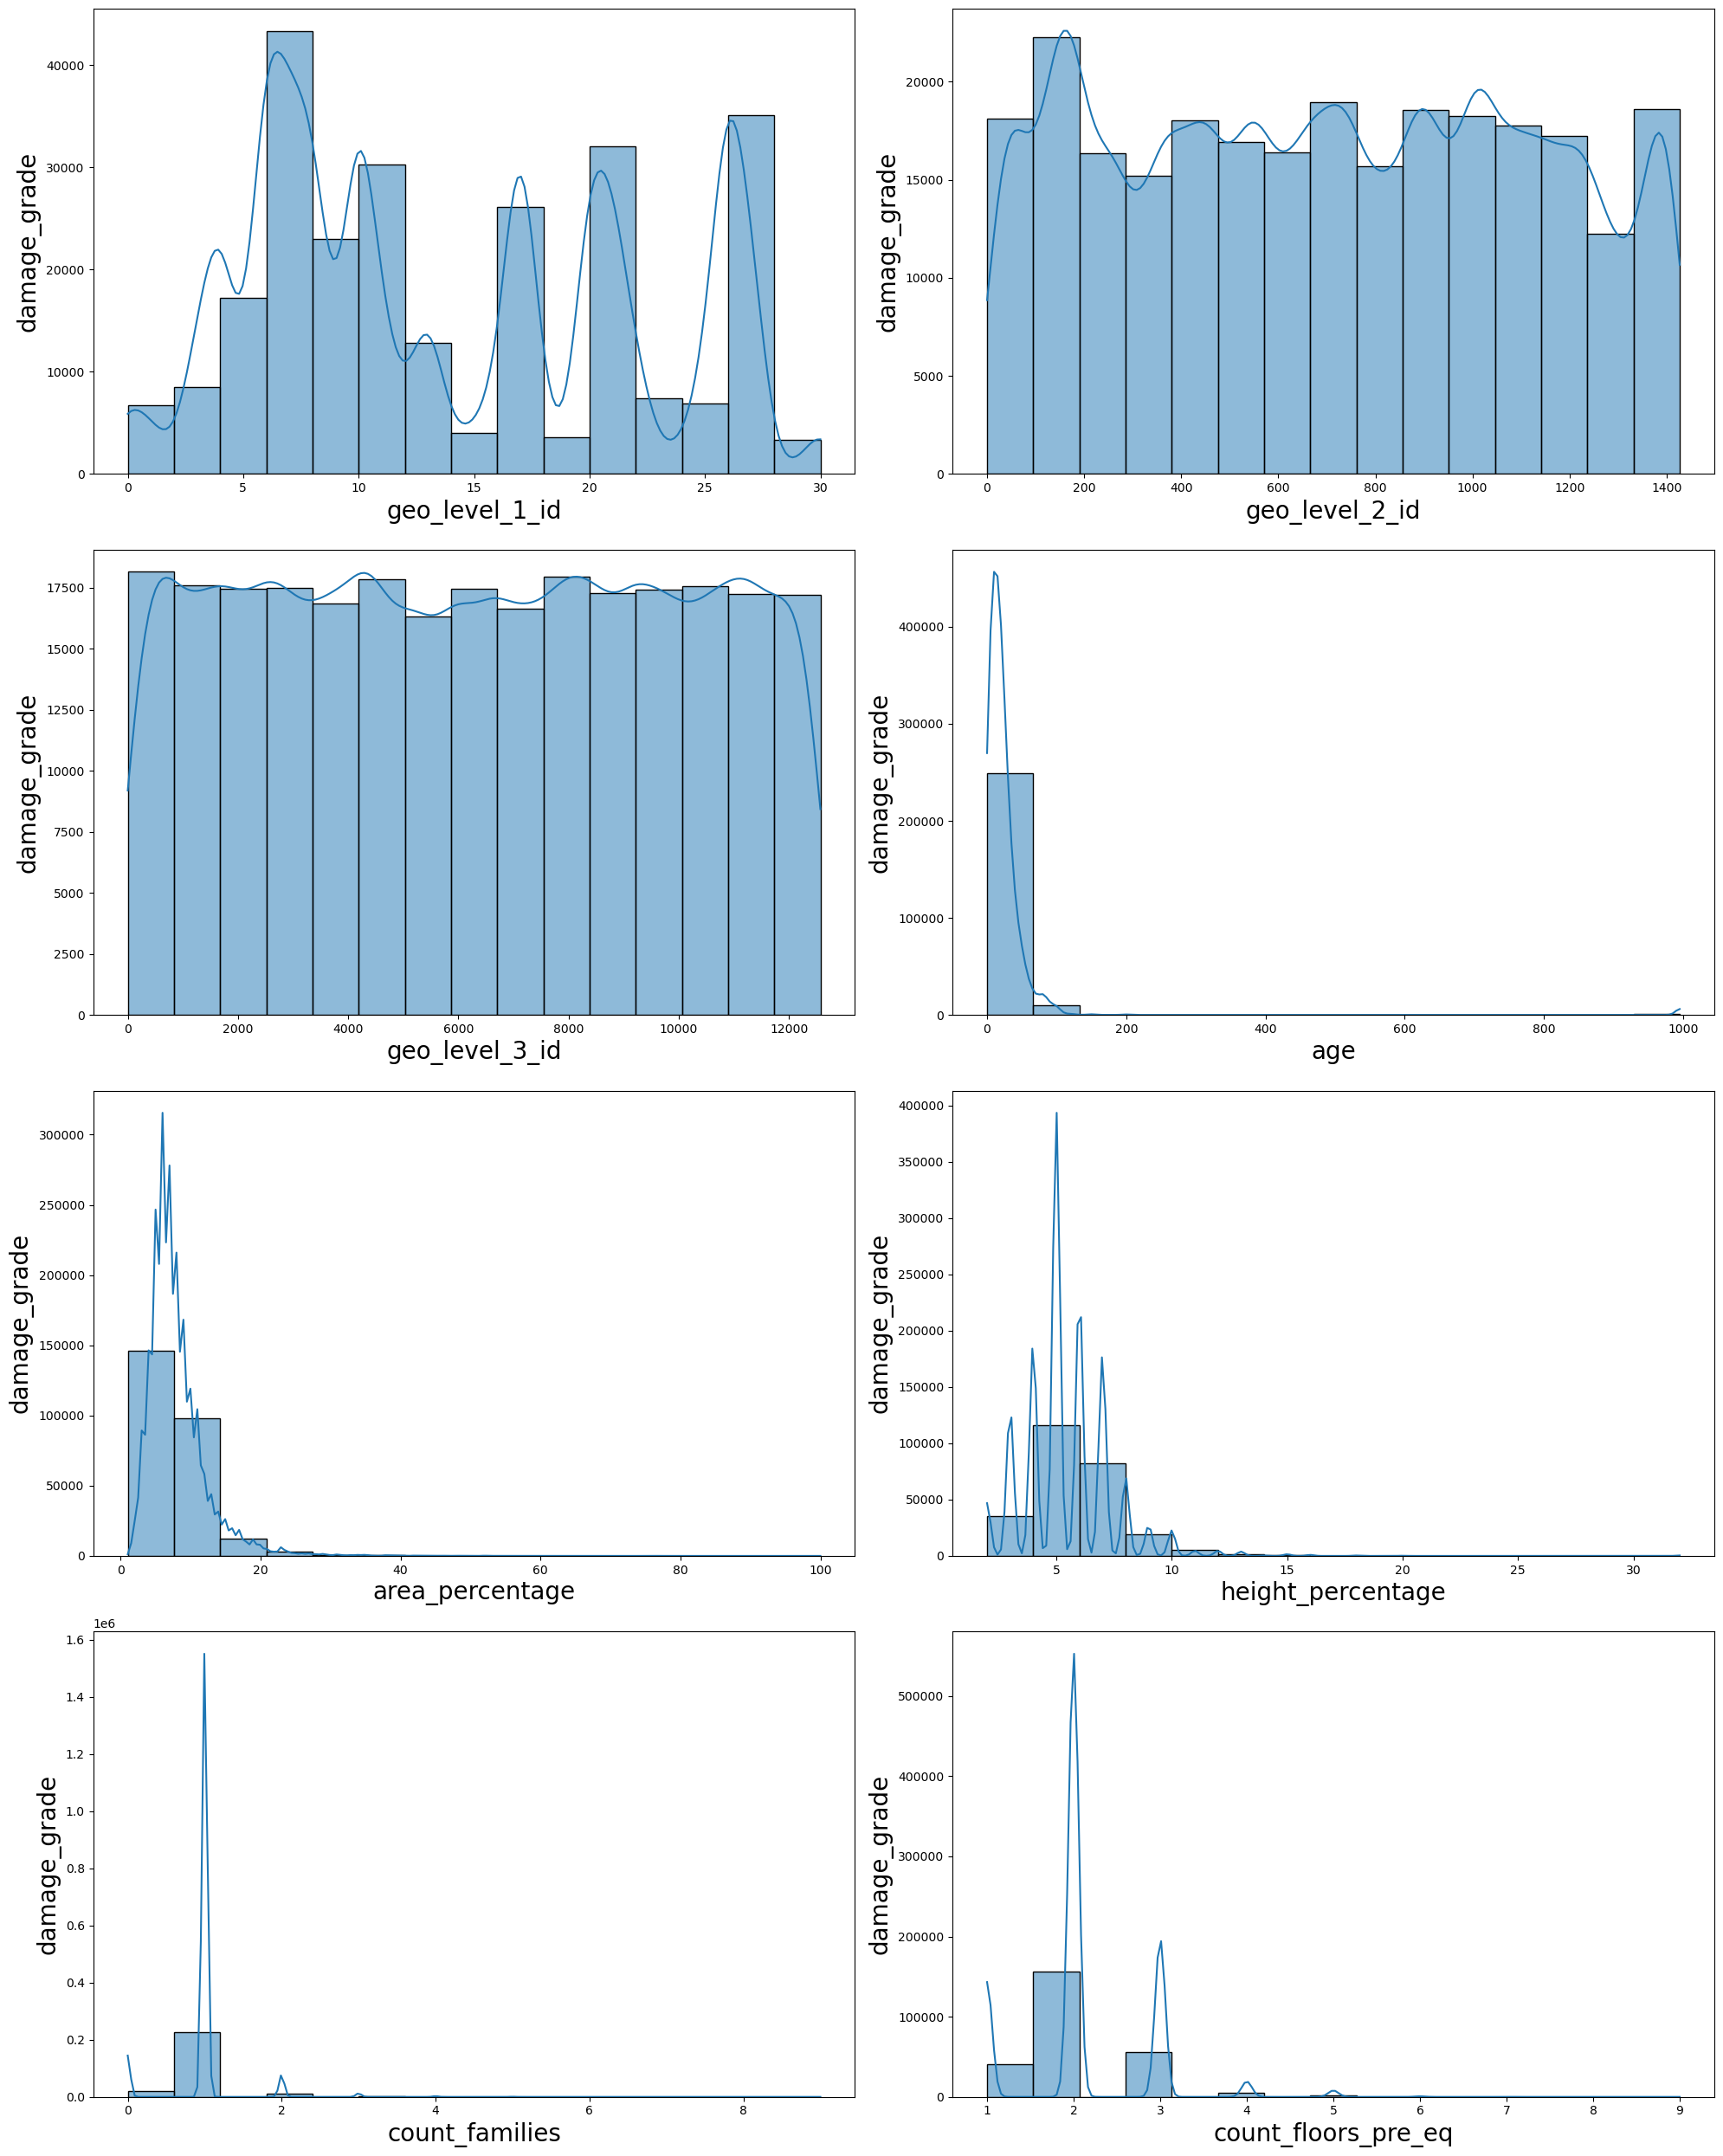

In [21]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in cont_col:
        plt.subplot(4,2,plotnumber)
        sns.histplot(x=cont_col[column].dropna(axis=0),bins=15,kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('damage_grade',fontsize=20)  
        plotnumber+=1   
plt.tight_layout()

- age, area_percentage, height_percentage, count_families, count_floor_pre_eq are right skewed.

### Bivariate Analysis

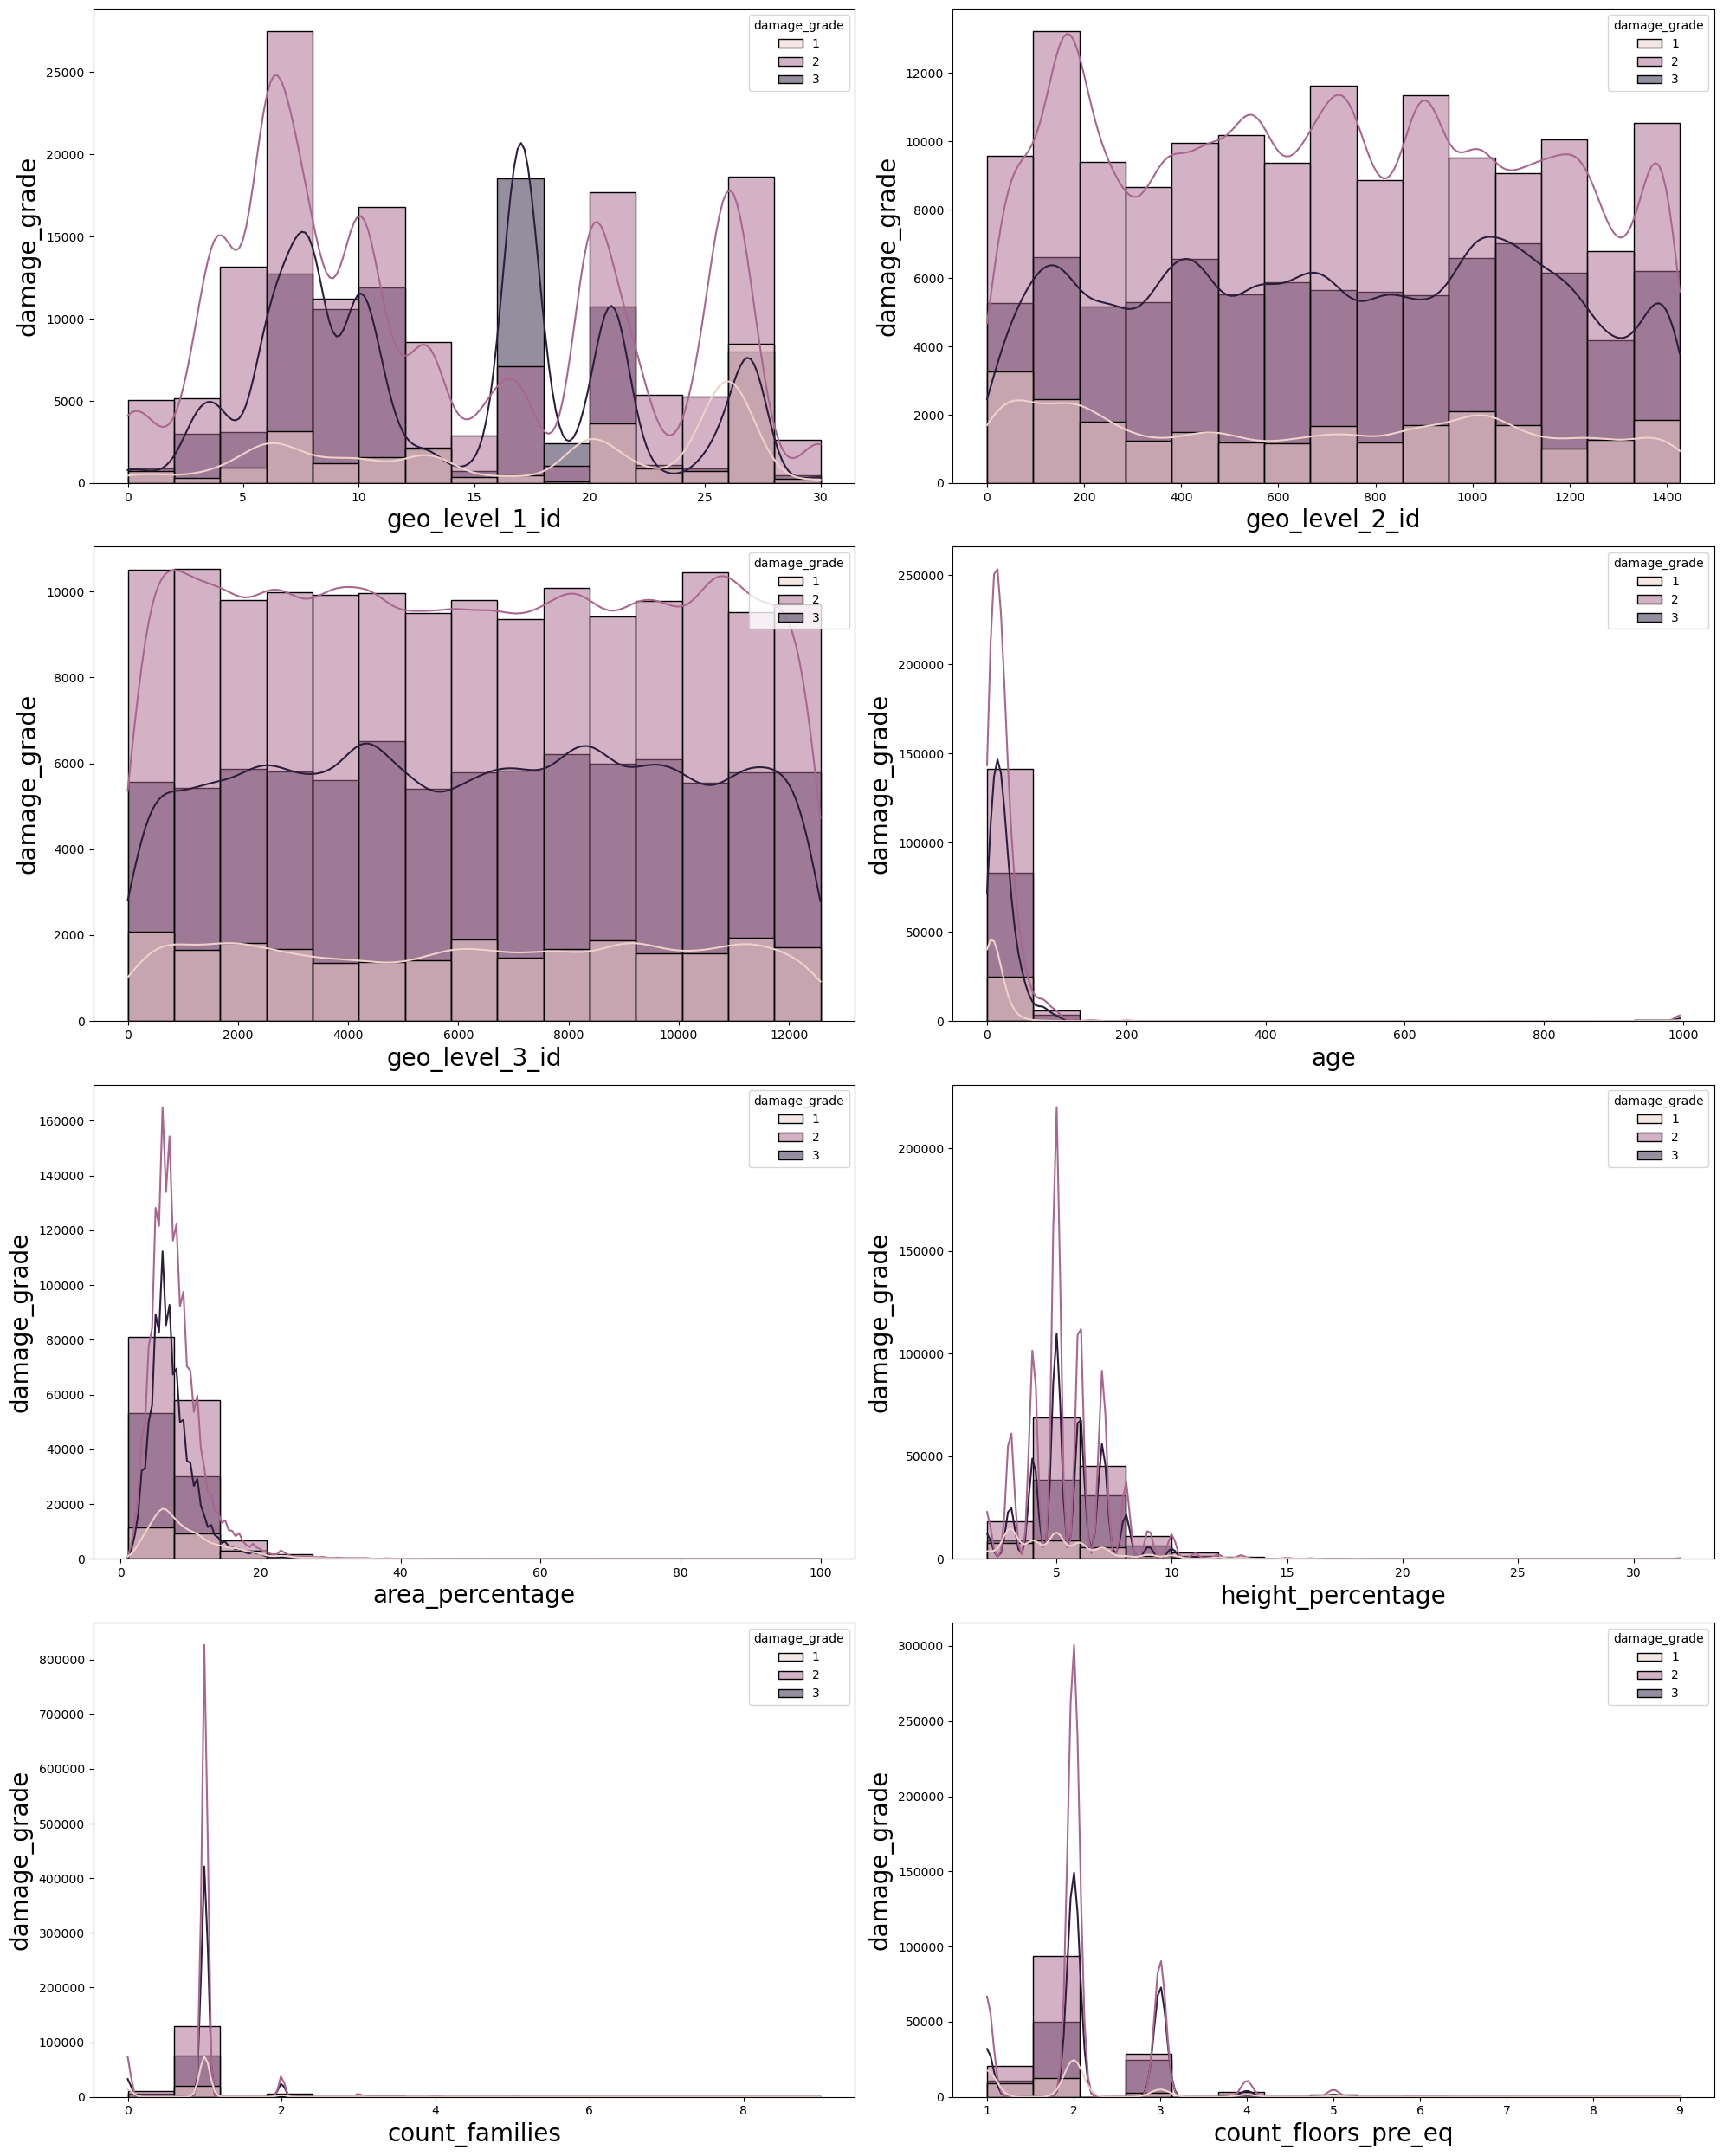

In [22]:
plt.figure(figsize=(20,25), facecolor='white') 
plotnumber = 1 

for column in cont_col:
        ax = plt.subplot(4,2,plotnumber)
        sns.histplot(x=cont_col[column].dropna(axis=0),hue=data.damage_grade,bins=15,kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('damage_grade',fontsize=20)
        plotnumber+=1
plt.tight_layout()

-  From plotting continuous feature values using kdeplot (kernel density plot), we can see there is few changes in pattern on columns geo_level_1_id,geo_level_2_id which will help us for better prediction


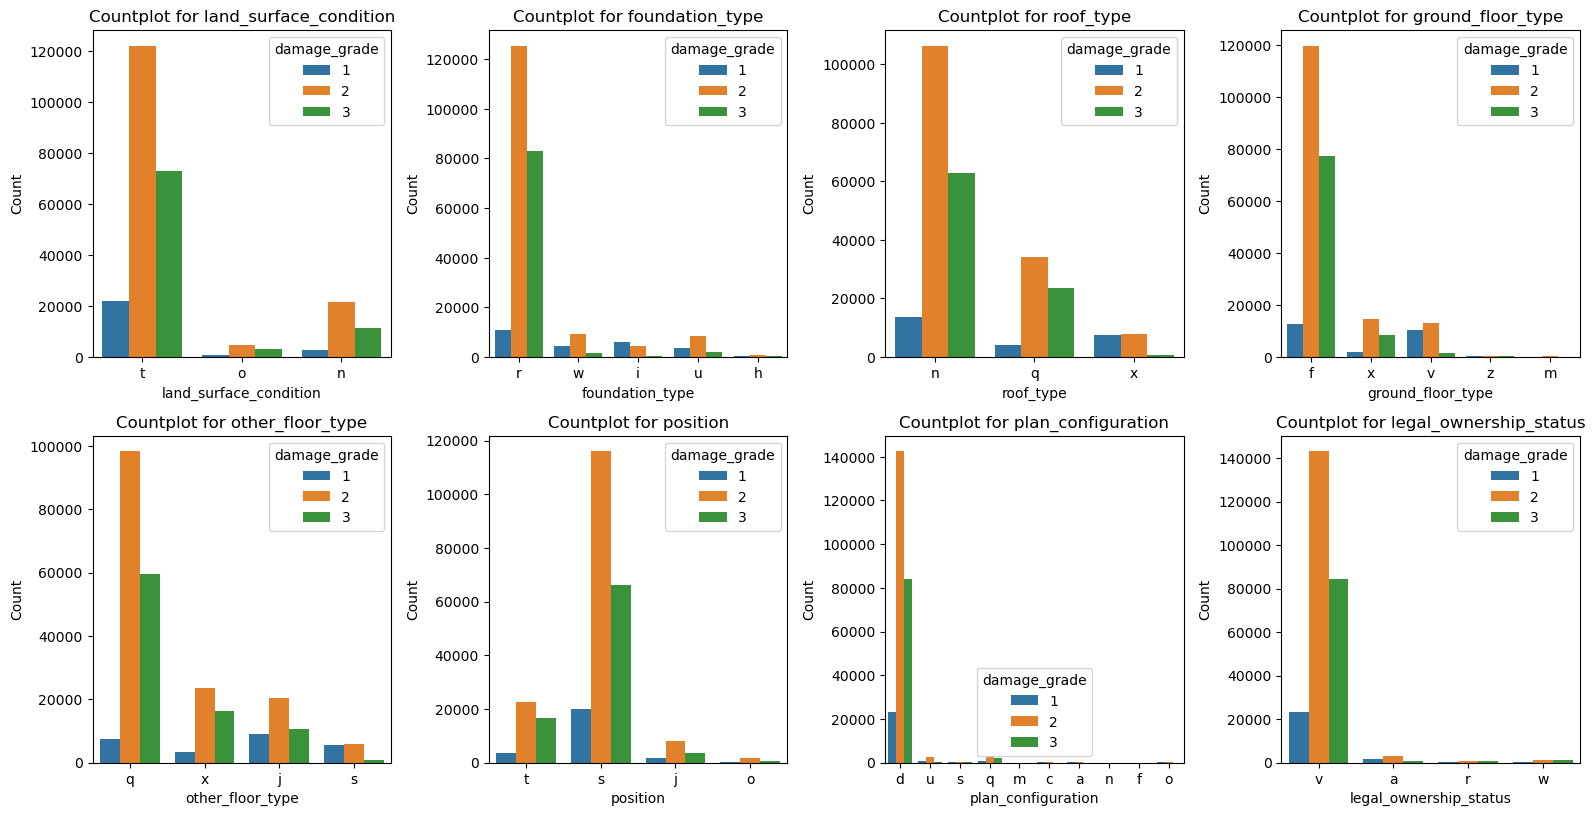

In [23]:
plt.figure(figsize=(16, 20))

for i, feature in enumerate(categorical_col):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=feature, hue='damage_grade', data=data)
    plt.title(f"Countplot for {feature}")
    plt.ylabel("Count")

plt.tight_layout()


- for all categorical features most of the data points are affected by damage_grade 2 and 3
- except in position, all other features are predominant in first class
- in plan_configuration the classes are hardly prsent.

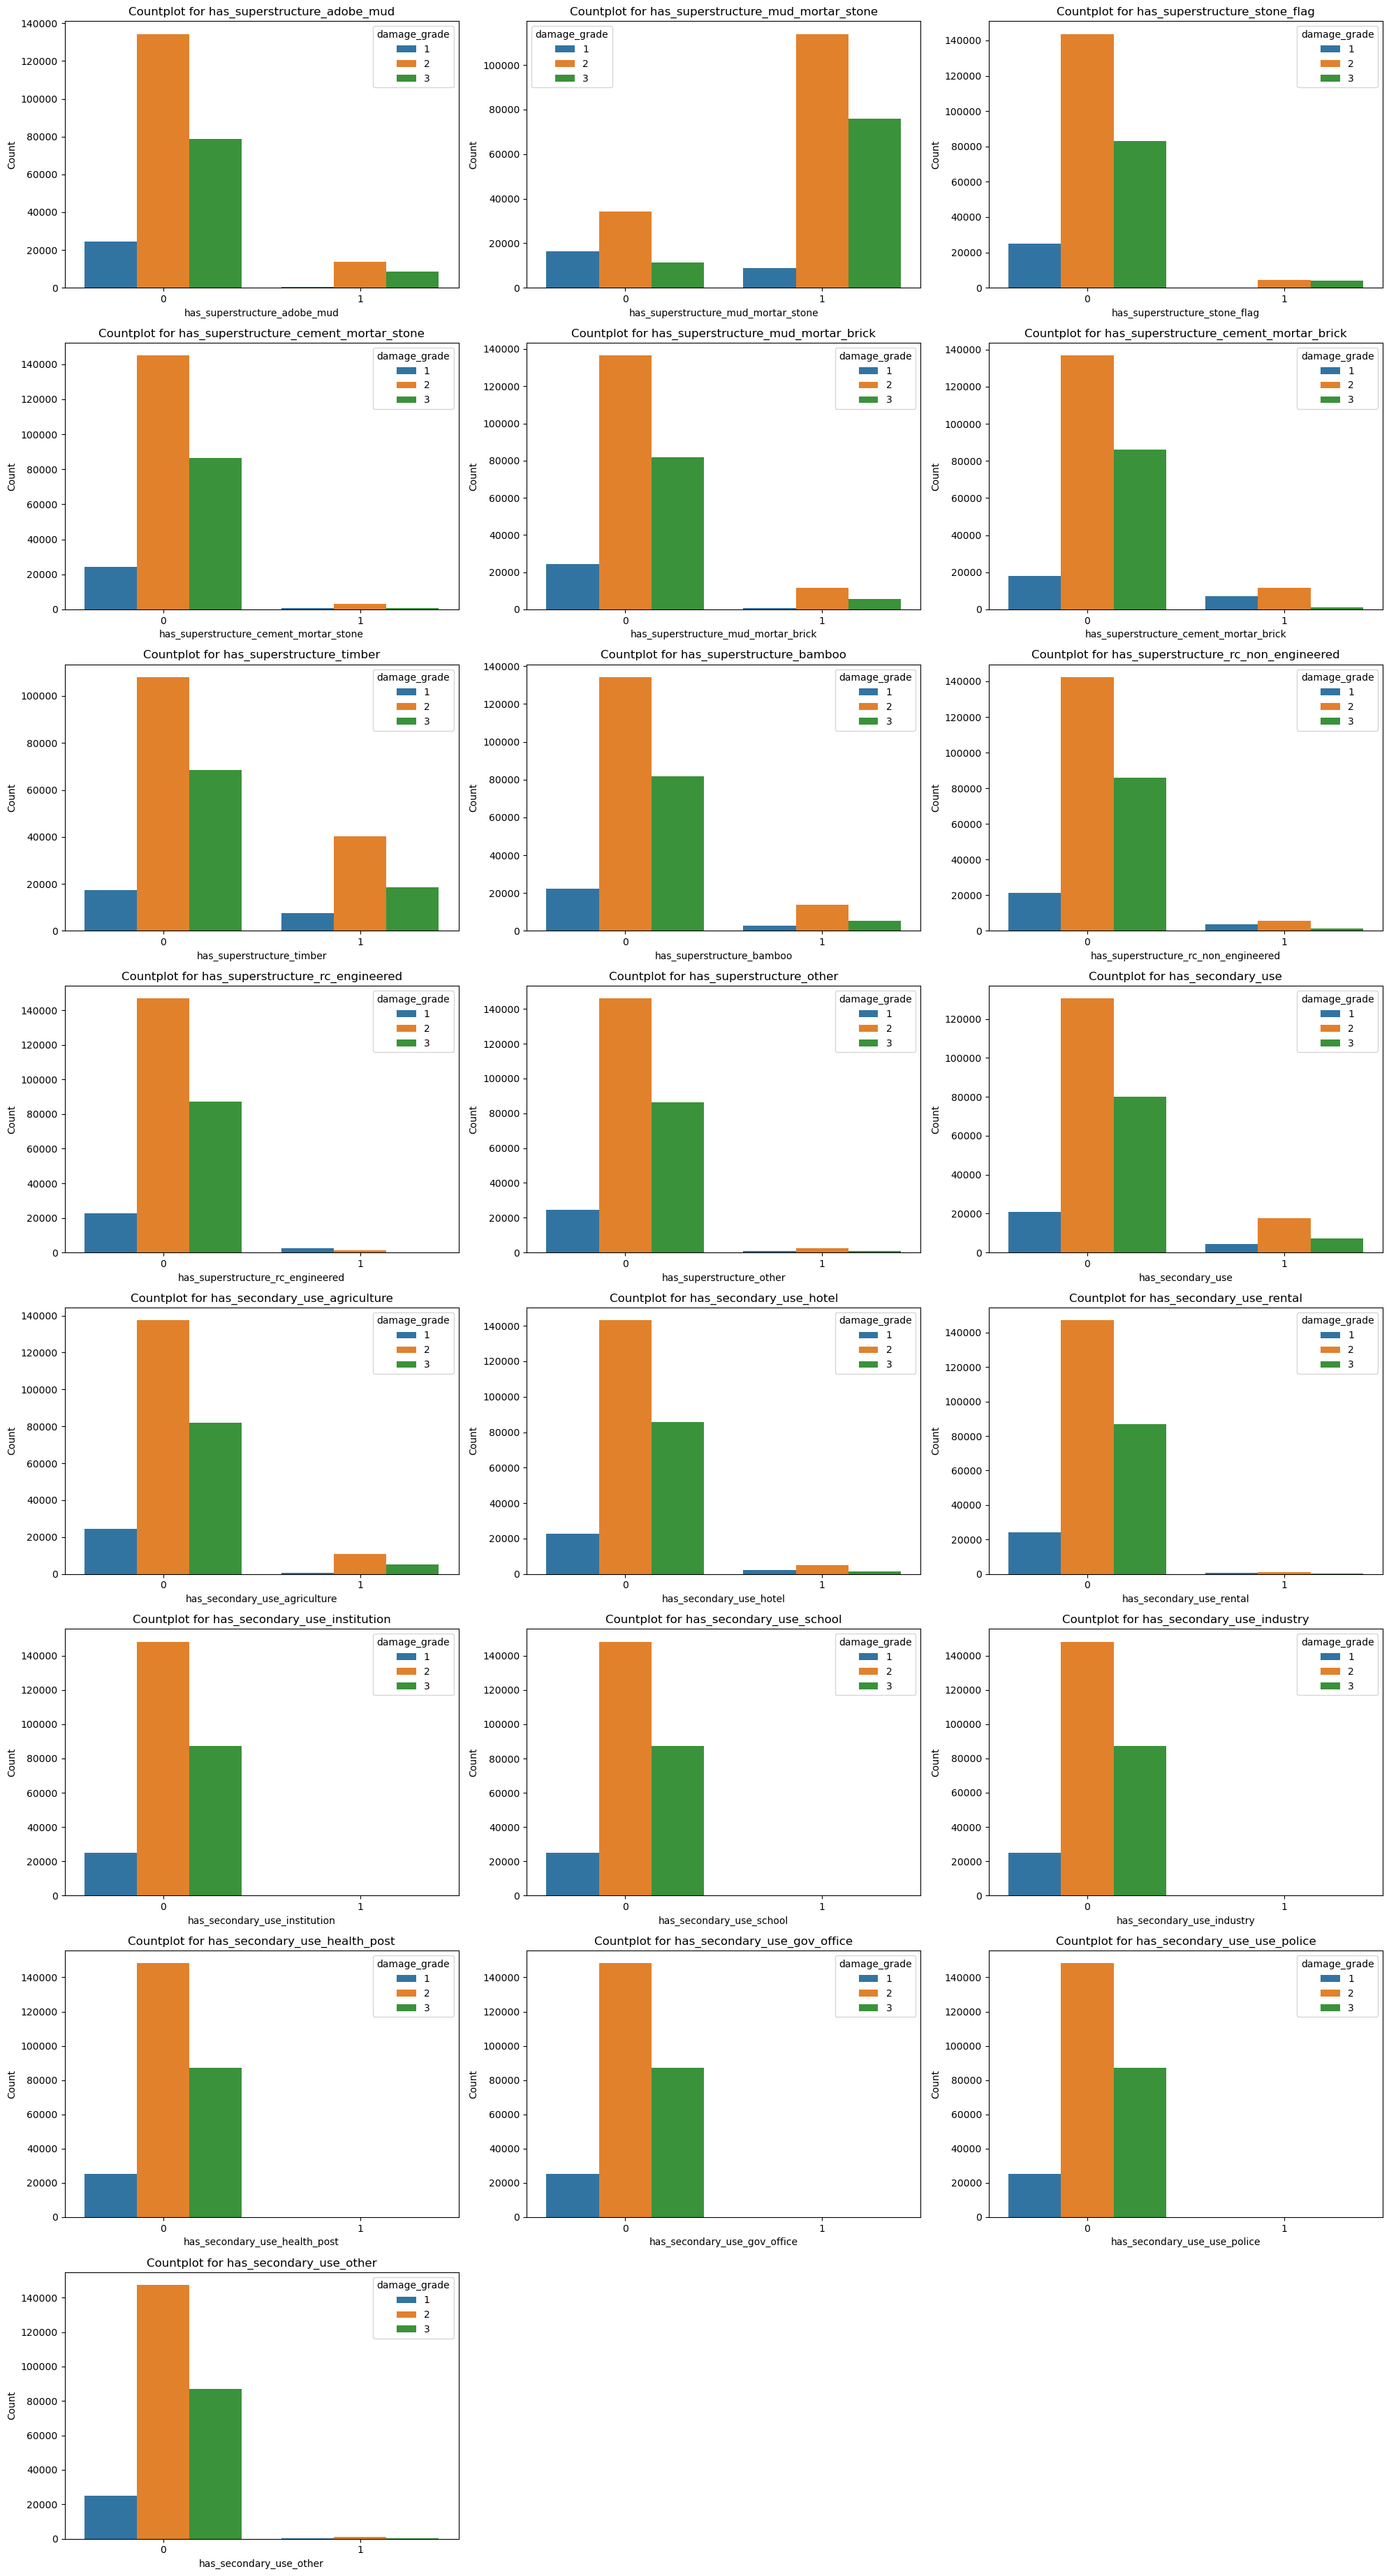

In [24]:
plt.figure(figsize=(20, 37))

for i, feature in enumerate(bin_cols):
    plt.subplot(8, 3, i+1)
    sns.countplot(x=feature, hue='damage_grade', data=data)
    plt.title(f"Countplot for {feature}")
    plt.ylabel("Count")

plt.tight_layout()


-  All binary columns have more zero than 1, except has_superstructure_mud_mortar_stone
-  In some columns there seems having only single value like all 0's, need to check.


### Multi-variate Analysis

<AxesSubplot:>

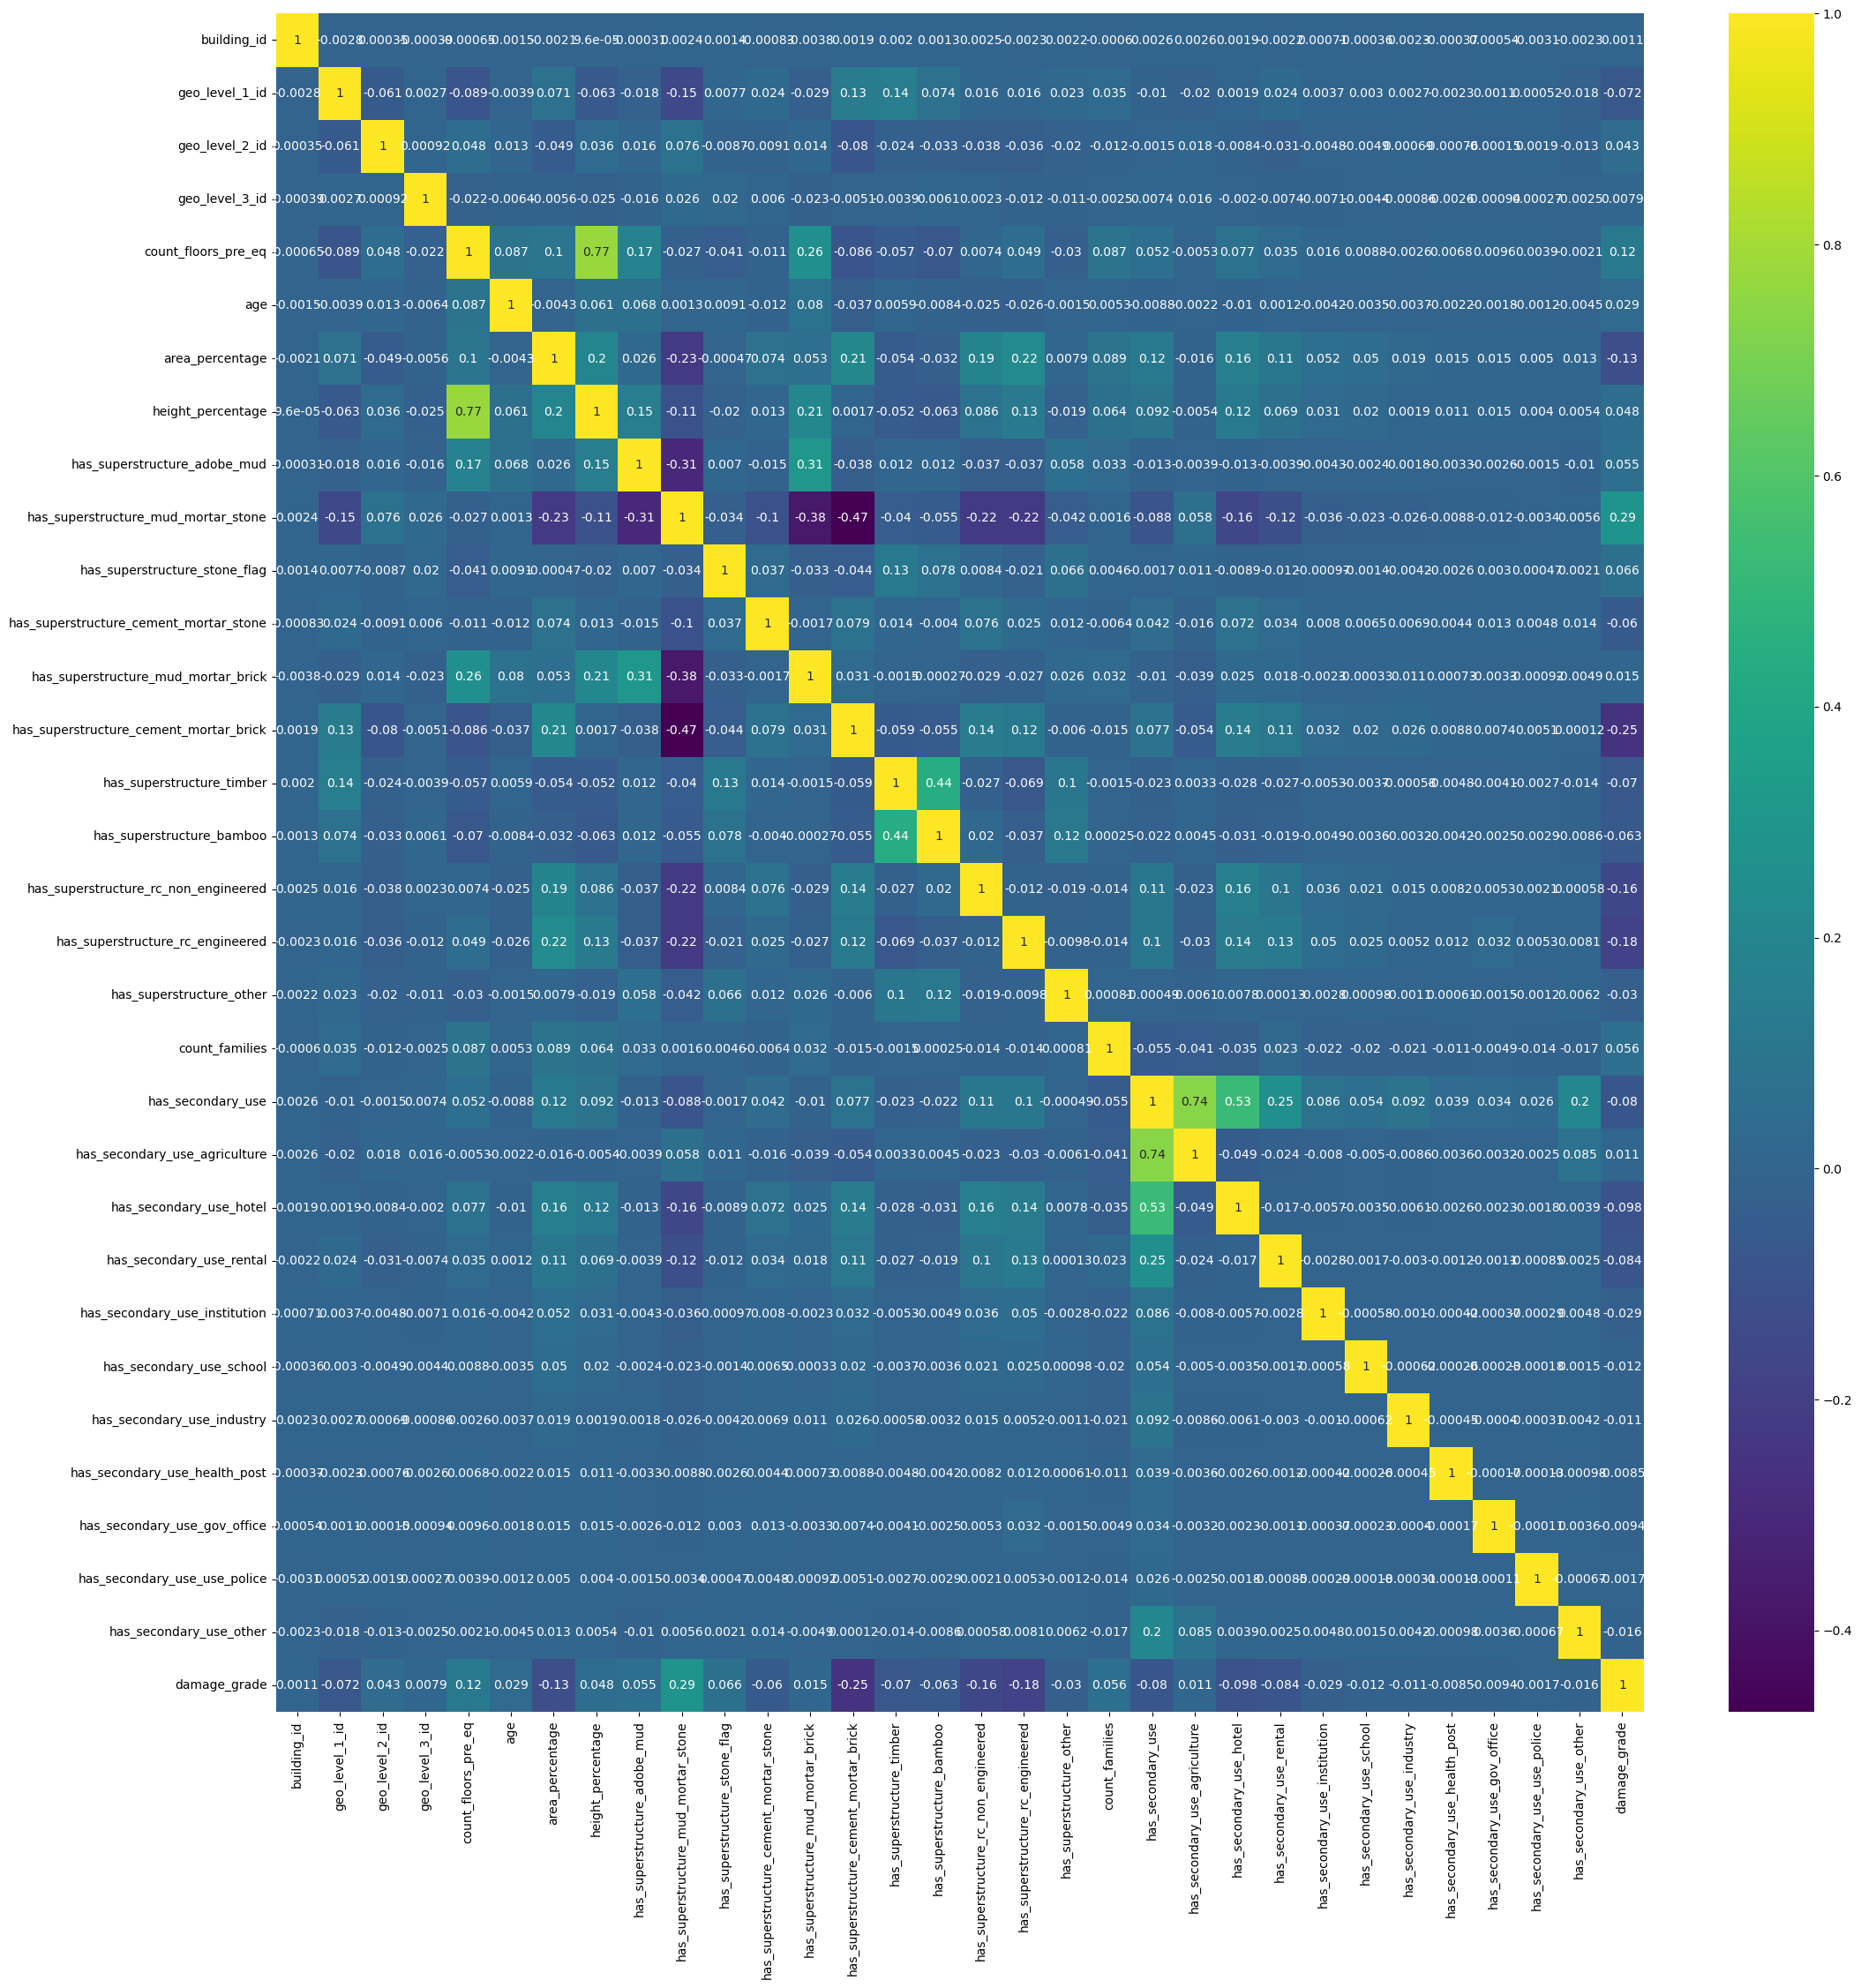

In [25]:
fig, ax = plt.subplots(1,1,figsize=(25,25))
cor = data.corr()
cor = pd.DataFrame(cor)
sns.heatmap(cor, cmap="viridis", annot=True)

- has_secondary_use and has_secondary_use_agriculture shows some corellation
- has_superstructure_timber and has_super_structure_bamboo showing correlation
- has_superstructure_mud_motor_brick and has_superstructure_adobe_mud shows correlation.
- count_floors_pre_eq and height_percentage shows correlation


## Data Preprocessing

In [26]:
data.duplicated().sum()

0

-  There are no duplicated values.

In [27]:
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

-  There are no missing values.

In [28]:
colname=[]
val=[]
bin_cols = data.columns[data.columns.str.contains('has')]
for bcol in bin_cols:
  colname.append(bcol)
  val.append(data[bcol].value_counts().sort_index().values)
pd.DataFrame(val, index=colname)


,0,1
has_superstructure_adobe_mud,237500,23101
has_superstructure_mud_mortar_stone,62040,198561
has_superstructure_stone_flag,251654,8947
has_superstructure_cement_mortar_stone,255849,4752
has_superstructure_mud_mortar_brick,242840,17761
has_superstructure_cement_mortar_brick,240986,19615
has_superstructure_timber,194151,66450
has_superstructure_bamboo,238447,22154
has_superstructure_rc_non_engineered,249502,11099
has_superstructure_rc_engineered,256468,4133


-  Let us check whether binary columns having only single values, because they will not help for model creation

-  all binarycolumns have both 1 and 0

### Handling outliers

In [29]:
cont_col

,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,count_families,count_floors_pre_eq
0,6,487,12198,30,6,5,1,2
1,8,900,2812,10,8,7,1,2
2,21,363,8973,10,5,5,1,2
3,22,418,10694,10,6,5,1,2
4,11,131,1488,30,8,9,1,3
...,...,...,...,...,...,...,...,...
260596,25,1335,1621,55,6,3,1,1
260597,17,715,2060,0,6,5,1,2
260598,17,51,8163,55,6,7,1,3
260599,26,39,1851,10,14,6,1,2


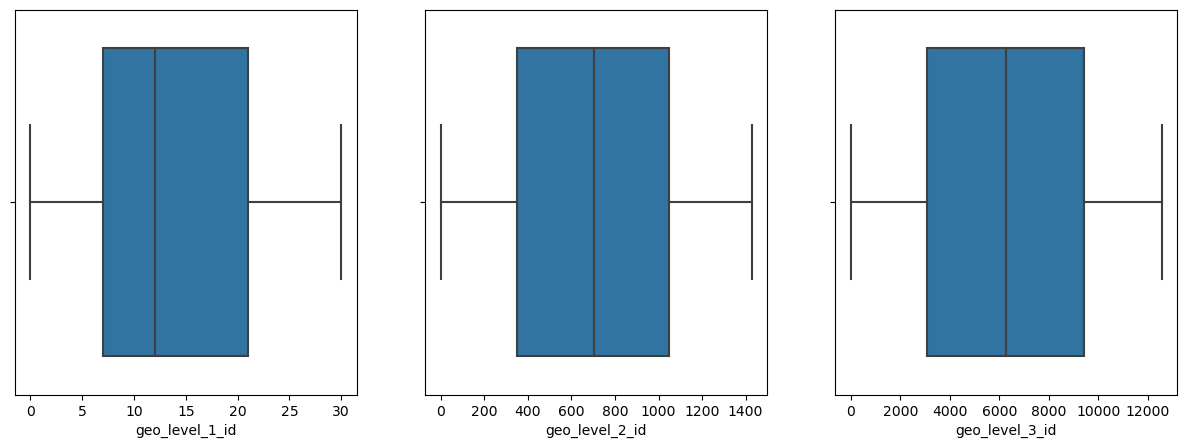

In [30]:
plt.figure(figsize=(15,5))
plotnumber=1
for column in cont_col.columns[:3]:
    plt.subplot(1,3,plotnumber)
    sns.boxplot(data[column])
    plt.xlabel(column)
    plotnumber+=1
plt.show()

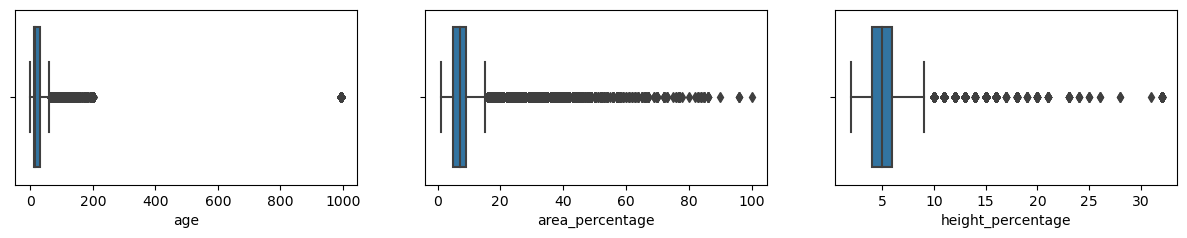

In [31]:
plt.figure(figsize=(15,5))
plotnumber=1
for column in cont_col.columns[3:6]:
    plt.subplot(2,3,plotnumber)
    sns.boxplot(data[column])
    plt.xlabel(column)
    plotnumber+=1
plt.show()

##### Handling outliers using Winsorization

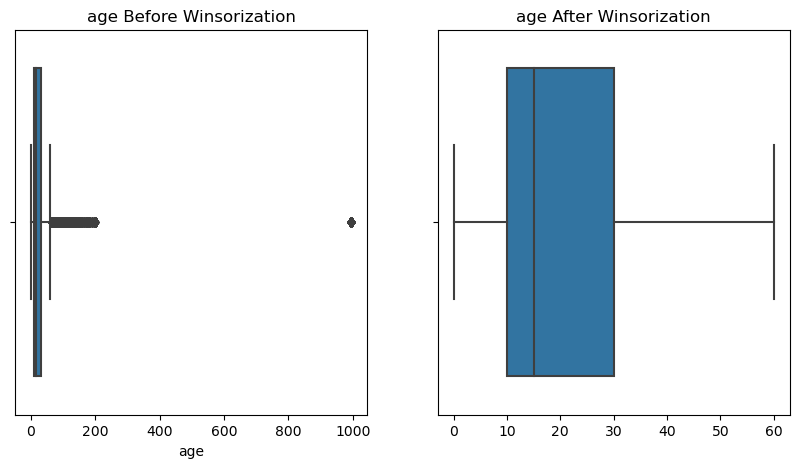

In [32]:
from scipy.stats.mstats import winsorize

name = "age"
df = data[name]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Before winsorization
sns.boxplot(df, ax=axes[0])
axes[0].set_title("{} Before Winsorization".format(name))

# Winsorization
winsorized_data = winsorize(df, (0, 0.06))

# After winsorization
sns.boxplot(winsorized_data, ax=axes[1])
axes[1].set_title("{} After Winsorization".format(name))

# Replace data in dataset
data[name] = winsorized_data

# Show the plots
plt.show()


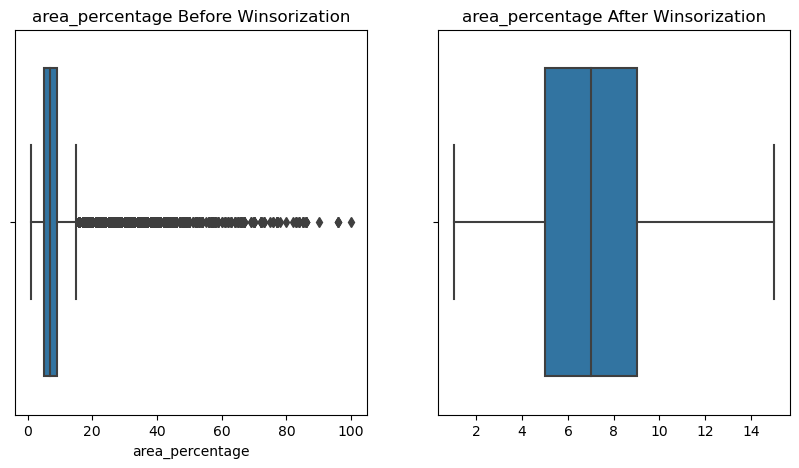

In [33]:
from scipy.stats.mstats import winsorize

name = "area_percentage"
df = data[name]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Before winsorization
sns.boxplot(df, ax=axes[0])
axes[0].set_title("{} Before Winsorization".format(name))

# Winsorization
winsorized_data = winsorize(df, (0, 0.06))

# After winsorization
sns.boxplot(winsorized_data, ax=axes[1])
axes[1].set_title("{} After Winsorization".format(name))

# Replace data in dataset
data[name] = winsorized_data

# Show the plots
plt.show()


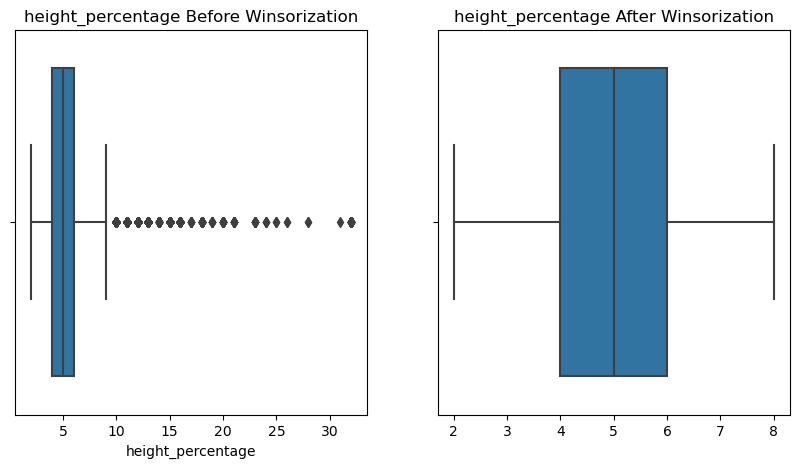

In [34]:
from scipy.stats.mstats import winsorize

name = "height_percentage"
df = data[name]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Before winsorization
sns.boxplot(df, ax=axes[0])
axes[0].set_title("{} Before Winsorization".format(name))

# Winsorization
winsorized_data = winsorize(df, (0, 0.06))

# After winsorization
sns.boxplot(winsorized_data, ax=axes[1])
axes[1].set_title("{} After Winsorization".format(name))

# Replace data in dataset
data[name] = winsorized_data

# Show the plots
plt.show()


### HANDLING CATEGORICAL DATA

In [35]:
categorical_col

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

##### using frequency encoding to convert categorical data into numerical.

In [36]:
freq = data['land_surface_condition'].value_counts(normalize=True)
print(freq)
data['land_surface_condition_freq'] = data['land_surface_condition'].map(freq)
data.drop('land_surface_condition',axis=1,inplace=True)

t    0.831758
n    0.136331
o    0.031911
Name: land_surface_condition, dtype: float64


In [37]:
freq = data['foundation_type'].value_counts(normalize=True)
print(freq)
data['foundation_type_freq'] = data['foundation_type'].map(freq)
data.drop('foundation_type',axis=1,inplace=True)

r    0.841117
w    0.058012
u    0.054720
i    0.040595
h    0.005556
Name: foundation_type, dtype: float64


In [38]:
freq = data['roof_type'].value_counts(normalize=True)
print(freq)
data['roof_type_frq'] = data['roof_type'].map(freq)
data.drop('roof_type',axis=1,inplace=True)

n    0.701617
q    0.236285
x    0.062099
Name: roof_type, dtype: float64


In [39]:
freq = data['ground_floor_type'].value_counts(normalize=True)
print(freq)
data['ground_floor_type_freq'] = data['ground_floor_type'].map(freq)
data.drop('ground_floor_type',axis=1,inplace=True)

f    0.804368
x    0.095460
v    0.094370
z    0.003853
m    0.001949
Name: ground_floor_type, dtype: float64


In [40]:
freq = data['other_floor_type'].value_counts(normalize=True)
print(freq)
data['other_floor_type_freq'] = data['other_floor_type'].map(freq)
data.drop('other_floor_type',axis=1,inplace=True)

q    0.634234
x    0.166722
j    0.152889
s    0.046155
Name: other_floor_type, dtype: float64


In [41]:
freq = data['position'].value_counts(normalize=True)
print(freq)
data['position_freq'] = data['position'].map(freq)
data.drop('position',axis=1,inplace=True)

s    0.775477
t    0.164604
j    0.050967
o    0.008952
Name: position, dtype: float64


In [42]:
freq = data['plan_configuration'].value_counts(normalize=True)
print(freq)
data['plan_configuration_freq'] = data['plan_configuration'].map(freq)
data.drop('plan_configuration',axis=1,inplace=True)

d    0.959597
q    0.021842
u    0.014002
s    0.001328
c    0.001247
a    0.000967
o    0.000610
m    0.000177
n    0.000146
f    0.000084
Name: plan_configuration, dtype: float64


In [43]:
freq = data['legal_ownership_status'].value_counts(normalize=True)
print(freq)
data['legal_ownership_statu_freq'] = data['legal_ownership_status'].map(freq)
data.drop('legal_ownership_status',axis=1,inplace=True)

v    0.962924
a    0.021151
w    0.010272
r    0.005652
Name: legal_ownership_status, dtype: float64


In [44]:
#dropping buildingid
data.drop('building_id',axis=1,inplace=True)

In [45]:
data.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

### Features selection 

In [46]:
# Making copy of data to data3
data1=data.copy()

In [47]:
data1.damage_grade=data.damage_grade.replace({1:0,2:0,3:1})

- 1 represents low damage
- 2 represents a medium amount of damage
- 3 represents almost complete destruction

###### In order to predict the damage occurring in the event of a strong earthquake, we have prepared model by combining low damage i.e., 1 with medium damage i.e., 2 , without disturbing critical damage 3.
-  so we are replacing 1 as 0, 2 as 0, and 3 as 1.


#### Checking the features importance 

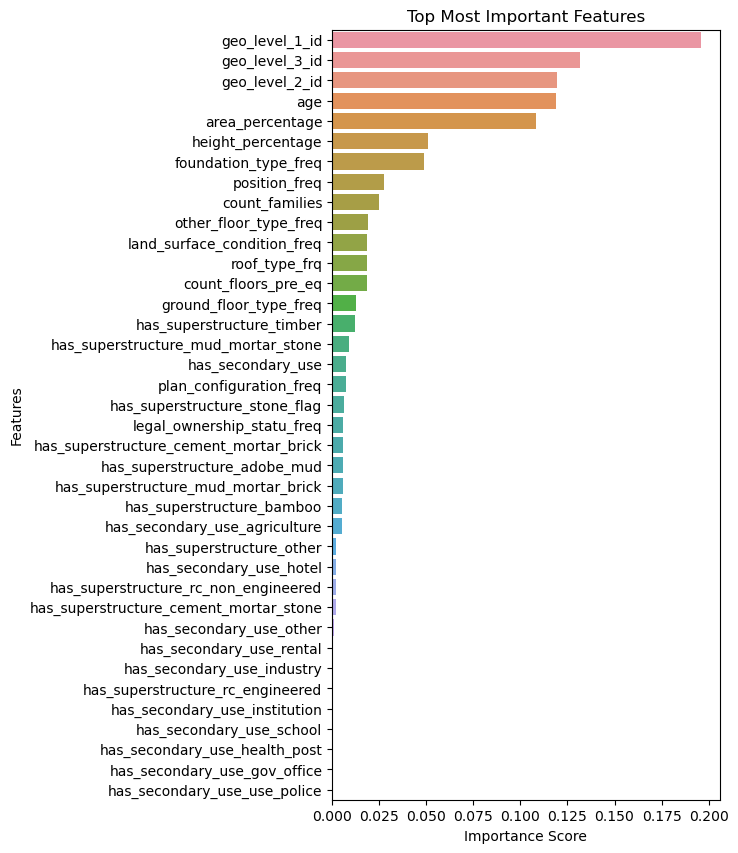

In [48]:
from sklearn.ensemble import RandomForestRegressor
x=data1.drop('damage_grade',axis=1)
y=data1['damage_grade']
# Train your Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x, y)

importances = rf_model.feature_importances_

# Create a dataframe of feature importances
feat_imp = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Sort the dataframe by feature importance score
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(5,10))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Top Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

- As we can see from the graph above, the most important variables to predict the damage grade of a house are the different geo-locations. This makes sense, since the level of destruction of one house is likely to be correlated with the average damage of the houses around.
-  The feature importance also shows that nearly all binary variables have a low feature importance, meaning they are providing the model with little to no predictive information. 
-  As can be seen above, nearly all binary features have a mean below ten percent. That implies that most rows are equal to zero.
-  Furthermore, it is visible that the binary variables with an average above ten percent have also a higher feature importance within our prediction model.



-  So, we are Dropping last 8 features 

In [49]:
data1.drop(['has_superstructure_rc_engineered','has_secondary_use_rental','has_secondary_use_other','has_secondary_use_industry','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_health_post','has_secondary_use_use_police','has_secondary_use_gov_office'],axis=1,inplace=True)


In [50]:
data1

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,damage_grade,land_surface_condition_freq,foundation_type_freq,roof_type_frq,ground_floor_type_freq,other_floor_type_freq,position_freq,plan_configuration_freq,legal_ownership_statu_freq
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.831758,0.841117,0.701617,0.804368,0.634234,0.164604,0.959597,0.962924
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.031911,0.841117,0.701617,0.095460,0.634234,0.775477,0.959597,0.962924
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.831758,0.841117,0.701617,0.804368,0.166722,0.164604,0.959597,0.962924
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0.831758,0.841117,0.701617,0.804368,0.166722,0.775477,0.959597,0.962924
4,11,131,1488,3,30,8,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.831758,0.841117,0.701617,0.804368,0.166722,0.775477,0.959597,0.962924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.136331,0.841117,0.701617,0.804368,0.152889,0.775477,0.021842,0.962924
260597,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.831758,0.841117,0.701617,0.804368,0.634234,0.775477,0.959597,0.962924
260598,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.831758,0.841117,0.236285,0.804368,0.634234,0.775477,0.959597,0.962924
260599,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.831758,0.841117,0.062099,0.094370,0.046155,0.050967,0.959597,0.962924


###### Declaring target and independent features

In [51]:
x=data1.drop('damage_grade',axis=1)
y=data1['damage_grade']

### Splitting

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(208480, 29)
(52121, 29)
(208480,)
(52121,)


### Scaling 

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


### Balancing data using SMOTE

In [56]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(X_train_scaled,y_train)

In [57]:
from collections import Counter
print('actual',Counter(y_train))
print('smote',Counter(y_train_smote))

actual Counter({0: 138726, 1: 69754})
smote Counter({0: 138726, 1: 138726})


# Modelling

##### LOGISTIC REGRESSION

In [58]:
#instantiating the object
lr= LogisticRegression(multi_class='ovr')
#training the model
lr.fit(x_train_smote, y_train_smote)

#predicting
y_test_pred_lr= lr.predict(X_test_scaled)

lr_f1_test = f1_score(y_test, y_test_pred_lr, average='macro')
print('F1 testing score: {:.3f}'.format(lr_f1_test))

F1 testing score: 0.570


In [59]:
#instantiating the object
lr= LogisticRegression(multi_class='multinomial')
#training the model
lr.fit(x_train_smote, y_train_smote)

#predicting
y_test_pred_lr= lr.predict(X_test_scaled)

lr_f1_test = f1_score(y_test, y_test_pred_lr, average='macro')
print('F1 testing score: {:.3f}'.format(lr_f1_test))

F1 testing score: 0.570


##### DECISION TREE CLASSIFIER

In [60]:
tree=DecisionTreeClassifier()
#training the model
tree.fit(x_train_smote, y_train_smote)

#predicting
y_test_pred_tree= tree.predict(X_test_scaled)

tree_f1_test = f1_score(y_test, y_test_pred_tree, average='macro')
print('F1 testing score: {:.3f}'.format(tree_f1_test))

F1 testing score: 0.708


##### RANDOM FOREST CLASSIFIER

In [61]:
#instantiating object
rf = RandomForestClassifier()
#fitting the model
rf.fit(x_train_smote, y_train_smote)

#predicting
y_test_pred_rf= rf.predict(X_test_scaled)

rf_f1_test = f1_score(y_test, y_test_pred_rf, average='macro')
print('F1 testing score: {:.3f}'.format(rf_f1_test))

F1 testing score: 0.756


###### ADA BOOST CLASSIFIER

In [62]:
#instantiating the object
ada_boost= AdaBoostClassifier()
#fitting the model
ada_boost.fit(x_train_smote, y_train_smote)

#predicting
y_test_pred_ada_boost= ada_boost.predict(X_test_scaled)

ada_boost_f1_test = f1_score(y_test, y_test_pred_ada_boost, average='macro')
print('F1 testing score: {:.3f}'.format(ada_boost_f1_test))

F1 testing score: 0.682


##### XG BOOST CLASSIFIER

In [63]:
#instantiating the object
xgb = XGBClassifier()
#fitting the model
xgb.fit(x_train_smote, y_train_smote)

#predicting
y_test_pred_xgb= xgb.predict(X_test_scaled)

xgb_f1_test = f1_score(y_test, y_test_pred_xgb, average='macro')
print('F1 testing score: {:.3f}'.format(xgb_f1_test))

F1 testing score: 0.757


## Model Comparision report

In [64]:
models = pd.DataFrame({
    'F1 score Test': [lr_f1_test, tree_f1_test, rf_f1_test, ada_boost_f1_test, xgb_f1_test]
}, index=['logistic regression', 'decision tree', 'random forest', 'adaboost', 'xgboost'])
models

,F1 score Test
logistic regression,0.570220
decision tree,0.708412
random forest,0.755676
adaboost,0.681815
xgboost,0.757165


-  The computational time required for SVC, KNN model is much higher, hence we have excluded them.
-  Top performing classifiers on the given dataset are Random Forest and XG Bosst. 
-  For model selection, we will do the hyper-parameter tuning for XG Boost. It might improve the F1 score.


### Hyperparameter tuning

-  we tried hyperparameter tuning for XG Boost.
-  Instead of exhaustively searching over all possible combinations of hyperparameters in GridSearch CV, RandomizedSearchCV samples a random subset of combinations, making it a more computationally efficient alternative to GridSearchCV

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rcv.fit(x_train_smote, y_train_smote)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.4, 'reg_alpha': 0.4, 'n_estimators': 130, 'learning_rate': 0.5, 'gamma': 0})


In [67]:
param_grid = {'gamma': [0,0.0001,0.001,0.001,0.01,0.1],
              'learning_rate': [0.001,0.01,0.1,0.35,0.4,0.45,0.5],
              'n_estimators': [90,95,100,110,115,130,120],
              'reg_alpha': [0.1,0.001,0.0001,0.3,0.35,0.25,0.4,1.5,1.0],
              'reg_lambda': [0.1,0.001,0.0001,0.3,0.35,0.25,0.4,1.5,1.0]}

XGB=XGBClassifier(random_state=42)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rcv.fit(x_train_smote, y_train_smote)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.001, 'reg_alpha': 1.0, 'n_estimators': 130, 'learning_rate': 0.5, 'gamma': 0.001})


In [68]:
XGB2=XGBClassifier(reg_lambda= 0.001, reg_alpha= 1.0, n_estimators=130, learning_rate=0.5, gamma=0.001)
XGB2.fit(x_train_smote, y_train_smote)#training 
y_predict=XGB2.predict(X_test_scaled)#testing


In [69]:
xgb_f1=f1_score(y_test,y_predict,average='macro')
xgb_f1

0.7684015925390101

### After tuning we can observe that F1 Score for XG Boost has improved. Out of all the models XG Boost is giving good F1score.

### EXPERIMENTATION

##### We created multiple models using PCA for feature selection, but the resultas were not satisfactory


In [104]:
data2=data1.copy()

In [105]:
data2

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,damage_grade,land_surface_condition_freq,foundation_type_freq,roof_type_frq,ground_floor_type_freq,other_floor_type_freq,position_freq,plan_configuration_freq,legal_ownership_statu_freq
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.831758,0.841117,0.701617,0.804368,0.634234,0.164604,0.959597,0.962924
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.031911,0.841117,0.701617,0.095460,0.634234,0.775477,0.959597,0.962924
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.831758,0.841117,0.701617,0.804368,0.166722,0.164604,0.959597,0.962924
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0.831758,0.841117,0.701617,0.804368,0.166722,0.775477,0.959597,0.962924
4,11,131,1488,3,30,8,8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.831758,0.841117,0.701617,0.804368,0.166722,0.775477,0.959597,0.962924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.136331,0.841117,0.701617,0.804368,0.152889,0.775477,0.021842,0.962924
260597,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.831758,0.841117,0.701617,0.804368,0.634234,0.775477,0.959597,0.962924
260598,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.831758,0.841117,0.236285,0.804368,0.634234,0.775477,0.959597,0.962924
260599,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.831758,0.841117,0.062099,0.094370,0.046155,0.050967,0.959597,0.962924


In [106]:
data2.damage_grade.value_counts()

0    173383
1     87218
Name: damage_grade, dtype: int64

In [107]:
x=data2.drop('damage_grade',axis=1)
y=data2['damage_grade']

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [109]:
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_sm)
X_test_scaled=scaler.transform(X_test)


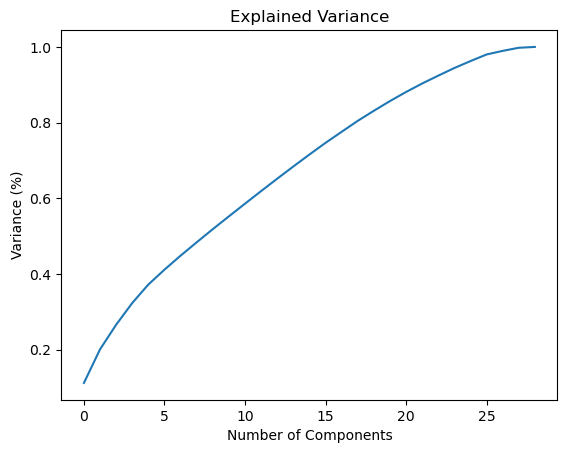

In [111]:
# getting the optimal number of pca
from sklearn.decomposition import PCA

# Initialize the PCA object
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca= pca.transform(X_test_scaled)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 

#np.cumcum - Returns the cumulative sum of the elements along a given axis.

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [112]:
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance_ratio >= 0.90) + 1
print('Number of components to retain:', n_components)

Number of components to retain: 22


In [113]:
X_train_pca[:,:22]

array([[ 0.36585828,  0.97947992, -1.39925179, ...,  1.80286241,
         1.59258902, -1.25304905],
       [-0.92066093,  2.35500362,  2.66514148, ..., -1.16450116,
        -0.78967099, -0.5585839 ],
       [-1.12101682, -0.21782151, -0.1349764 , ..., -0.8149755 ,
         0.64373386, -0.29996409],
       ...,
       [-0.86066   , -0.49199109, -0.46620837, ...,  0.15846612,
        -0.33127811,  0.01815312],
       [-0.84726378, -0.67464141, -0.07634087, ..., -0.39245406,
        -0.23764524,  0.21891582],
       [-1.25444374, -0.32649866, -0.01013706, ..., -0.21756339,
         0.22117271, -0.06568328]])

In [114]:
# Creating a Dataframe with  principal components
x_train_pca_data=pd.DataFrame(X_train_pca[:,:22])
x_train_pca_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.365858,0.979480,-1.399252,0.800678,2.279661,1.126759,1.706791,0.926945,0.139201,-3.873760,1.148672,1.207284,0.426892,-2.376470,1.139894,-0.463834,0.380377,-0.176278,-2.144104,1.802862,1.592589,-1.253049
1,-0.920661,2.355004,2.665141,-0.014466,-0.104661,2.160430,-1.500984,1.024960,0.331335,-1.015071,-0.045516,-0.026911,-0.781416,-1.431764,-1.285516,-0.969489,-0.126542,-0.184469,0.637661,-1.164501,-0.789671,-0.558584
2,-1.121017,-0.217822,-0.134976,0.166230,0.766764,-1.313587,-1.295201,3.326303,0.725843,0.418034,1.523829,0.442674,-0.396153,-0.121976,0.334025,2.863070,1.395623,-0.689113,2.218612,-0.814976,0.643734,-0.299964
3,0.572130,-0.500255,0.014750,-1.243036,-0.179782,2.415786,0.807697,0.236770,-1.313252,3.945974,-3.269013,5.141315,-0.837990,-1.708170,2.788941,0.876175,0.434920,1.075805,1.204306,0.301875,0.447687,-0.142901
4,-1.033170,1.181494,-0.106200,-0.957636,-1.334498,-0.912400,-0.322122,-0.881342,-0.782069,0.240039,0.154157,-0.010151,0.254452,-0.515679,-0.488632,0.274254,0.559819,0.405286,0.185024,1.093016,0.294608,0.167478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277447,-0.965158,1.009986,0.146298,-0.931110,-1.286147,-0.258945,0.662623,0.466425,-1.529519,0.129266,-0.666897,-0.076195,0.210732,0.566832,-0.948224,0.273250,0.428069,-1.161470,-0.363176,-0.739379,-0.464772,0.202754
277448,-1.006723,0.740503,-0.008629,-0.650563,-0.607848,-0.851951,-0.572117,0.671023,0.129285,0.469664,0.932342,0.693852,-0.400138,-0.514398,-0.012171,1.297270,0.024629,-0.713304,-0.088753,-0.613561,1.101790,0.096968
277449,-0.860660,-0.491991,-0.466208,1.919592,-0.672380,2.105080,0.557727,-0.648718,0.899748,1.859511,0.039507,-0.512027,3.121227,-0.098211,-2.226253,1.626759,-0.392080,-0.318076,-0.914666,0.158466,-0.331278,0.018153
277450,-0.847264,-0.674641,-0.076341,-0.609234,-0.350895,-0.991268,0.809958,0.332594,1.429656,0.213158,0.282804,0.828647,-0.457787,0.309798,0.024071,-0.754321,0.276275,-0.810071,-0.665160,-0.392454,-0.237645,0.218916


In [115]:
x_test_pca_data=pd.DataFrame(X_test_pca[:,:22])
x_test_pca_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-0.711662,-2.118189,-0.050442,-0.581962,1.401504,0.590564,0.249982,0.749970,0.555992,-0.188659,-0.697500,-0.466803,0.155572,1.570800,0.334751,-0.049152,0.127453,0.097884,0.471243,-0.118774,-0.171947,0.120547
1,-1.617461,0.572030,-0.168070,-0.355073,0.116539,-0.399324,0.406904,1.185743,1.214465,0.032248,-0.780004,0.218445,0.232731,0.849347,-0.720028,-0.885480,0.826482,0.642897,1.346739,-0.076458,1.132002,-0.430691
2,0.843513,1.754036,-1.569830,0.197858,2.016379,-1.201969,0.726472,-0.238871,1.973484,0.509146,-0.182525,0.608702,-0.707245,-0.265491,0.078503,-1.354220,-0.283848,-0.052928,1.157948,-0.173983,1.747589,2.812536
3,-1.344312,1.002689,-0.186773,0.489626,-1.725286,1.170648,-0.524378,0.294531,-1.036236,-0.501353,0.145559,-1.190525,-0.431608,-1.590872,-0.135992,-0.554102,-0.243813,0.742555,1.793824,1.202014,0.411997,-0.145716
4,-0.670196,-1.146655,0.003731,-0.794097,0.614312,0.380606,0.283234,-0.084485,0.282926,-0.002531,-0.002977,-0.133626,-0.071886,0.795648,0.607481,0.286325,-0.096819,-0.576353,0.070203,-0.410534,-0.170010,0.203587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52116,1.942835,1.901076,3.677256,-0.547838,-1.588747,-0.119770,1.914689,1.291743,-0.595396,-2.450651,4.158758,3.254893,2.786691,1.689068,1.636397,-1.199927,-0.448604,-1.019359,-0.867397,3.318962,0.675692,0.522306
52117,0.274908,-1.279445,-0.875823,2.335657,-2.037107,-0.728870,-0.560045,-0.950871,-1.285051,-0.259408,-0.601168,-0.671497,0.971378,0.528484,0.505254,-0.487028,-0.193108,-0.046803,0.664093,0.341022,-0.960442,0.246933
52118,0.207066,0.858345,4.183936,-0.098165,0.653105,1.314347,-1.502575,0.744576,-1.412997,0.783236,1.872111,0.983915,1.349288,2.956921,0.491469,-1.565190,-0.204640,-1.343784,1.076108,2.133528,1.469594,-0.288789
52119,0.641988,-1.076039,-0.154908,-1.216881,-0.371838,0.927058,0.069833,-0.784801,-0.032162,0.001829,1.348070,-0.713190,-1.143377,-1.953131,0.243414,-0.450928,-0.632036,0.318429,0.396707,0.752793,0.341156,0.558995


In [116]:
#instantiating the object
lr= LogisticRegression(multi_class='multinomial')
#training the model
lr.fit(x_train_pca_data, y_train_sm)
#predicting
y_test_pred_lr_pca= lr.predict(x_test_pca_data)
lr_f1_test_pca = f1_score(y_test, y_test_pred_lr_pca, average='macro')
print('F1 testing score: {:.3f}'.format(lr_f1_test_pca))

F1 testing score: 0.565


In [117]:
#instantiating the object
lr= LogisticRegression(multi_class='ovr')
#training the model
lr.fit(x_train_pca_data, y_train_sm)
#predicting
y_test_pred_lr_pca= lr.predict(x_test_pca_data)
lr_f1_test_pca = f1_score(y_test, y_test_pred_lr_pca, average='macro')
print('F1 testing score: {:.3f}'.format(lr_f1_test_pca))

F1 testing score: 0.565


In [118]:
tree=DecisionTreeClassifier()
#training the model
tree.fit(x_train_pca_data, y_train_sm)
y_test_pred_tree_pca= tree.predict(x_test_pca_data)
tree_f1_test_pca = f1_score(y_test, y_test_pred_tree_pca, average='macro')
print('F1 testing score: {:.3f}'.format(tree_f1_test_pca))

F1 testing score: 0.635


In [119]:
rf = RandomForestClassifier()
#fitting the model
rf.fit(x_train_pca_data, y_train_sm)
y_test_pred_rf_pca= rf.predict(x_test_pca_data)

rf_f1_test_pca= f1_score(y_test, y_test_pred_rf_pca, average='macro')
print('F1 testing score: {:.3f}'.format(rf_f1_test_pca))

F1 testing score: 0.701


In [120]:
from sklearn.ensemble import AdaBoostClassifier
#instantiating the object
ada_boost= AdaBoostClassifier()
#fitting the model
ada_boost.fit(x_train_pca_data, y_train_sm)
#predicting
y_test_pred_adaboost_pca= ada_boost.predict(x_test_pca_data)

adaboost_f1_test_pca = f1_score(y_test, y_test_pred_adaboost_pca, average='macro')
print('F1 testing score: {:.3f}'.format(adaboost_f1_test_pca))


F1 testing score: 0.586


In [121]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_pca_data, y_train_sm)
y_test_pred_xgb_pca= xgb.predict(x_test_pca_data)
xgb_f1_test_pca = f1_score(y_test, y_test_pred_xgb_pca, average='macro')
print('F1 testing score: {:.3f}'.format(xgb_f1_test_pca))


F1 testing score: 0.655


In [122]:
models = pd.DataFrame({
    'F1 score Test': [lr_f1_test_pca, tree_f1_test_pca, rf_f1_test_pca, adaboost_f1_test_pca, xgb_f1_test_pca]
}, index=['logistic regression', 'decision tree', 'random forest', 'adaboost', 'xgboost'])
models

,F1 score Test
logistic regression,0.565265
decision tree,0.634692
random forest,0.700704
adaboost,0.585740
xgboost,0.655477


#### In order to predict damage grades 1, 2, and 3 classes seperately ,without combining 1 and 2, we have used feature selection and then created models.


In [89]:
# Making copy of data to data3
data3=data.copy()
data3

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_freq,foundation_type_freq,roof_type_frq,ground_floor_type_freq,other_floor_type_freq,position_freq,plan_configuration_freq,legal_ownership_statu_freq
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0.831758,0.841117,0.701617,0.804368,0.634234,0.164604,0.959597,0.962924
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0.031911,0.841117,0.701617,0.095460,0.634234,0.775477,0.959597,0.962924
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0.831758,0.841117,0.701617,0.804368,0.166722,0.164604,0.959597,0.962924
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0.831758,0.841117,0.701617,0.804368,0.166722,0.775477,0.959597,0.962924
4,11,131,1488,3,30,8,8,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0.831758,0.841117,0.701617,0.804368,0.166722,0.775477,0.959597,0.962924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0.136331,0.841117,0.701617,0.804368,0.152889,0.775477,0.021842,0.962924
260597,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0.831758,0.841117,0.701617,0.804368,0.634234,0.775477,0.959597,0.962924
260598,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0.831758,0.841117,0.236285,0.804368,0.634234,0.775477,0.959597,0.962924
260599,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0.831758,0.841117,0.062099,0.094370,0.046155,0.050967,0.959597,0.962924


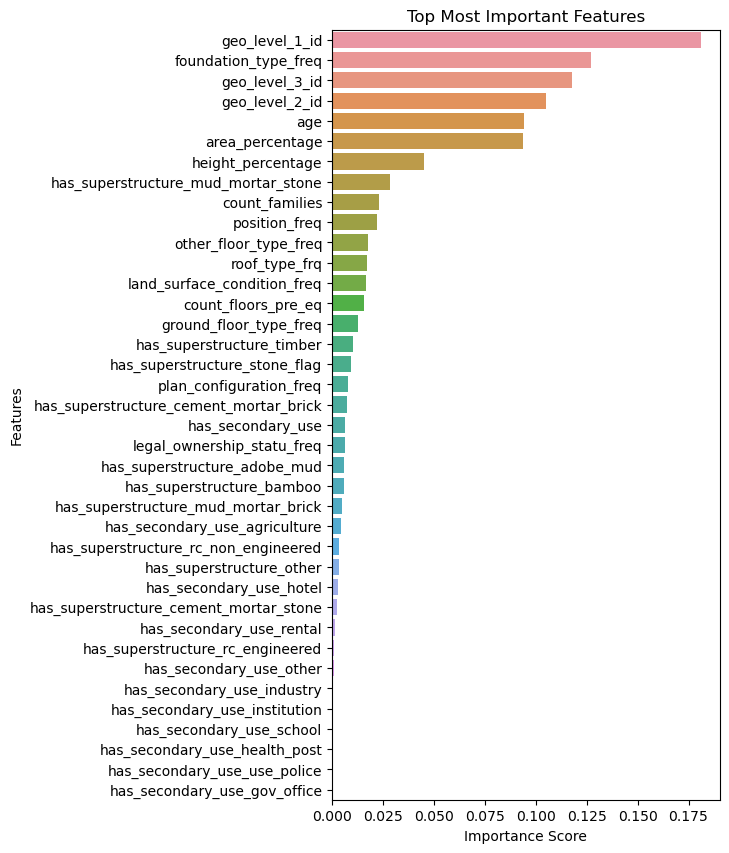

In [90]:
from sklearn.ensemble import RandomForestRegressor
x=data3.drop('damage_grade',axis=1)
y=data3['damage_grade']
# Train your Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x, y)

importances = rf_model.feature_importances_

# Create a dataframe of feature importances
feat_imp = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Sort the dataframe by feature importance score
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(5,10))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Top Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [91]:
data3.drop(['has_superstructure_rc_engineered','has_secondary_use_rental','has_secondary_use_other','has_secondary_use_industry','has_secondary_use_institution','has_secondary_use_school','has_secondary_use_health_post','has_secondary_use_use_police','has_secondary_use_gov_office'],axis=1,inplace=True)


In [92]:
data3.damage_grade=data3.damage_grade.replace({1:0,2:1,3:2})

In [93]:
x=data3.drop('damage_grade',axis=1)
y=data3['damage_grade']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(208480, 29)
(52121, 29)
(208480,)
(52121,)


In [95]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [96]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(X_train_scaled,y_train)

In [97]:
#instantiating the object
lr= LogisticRegression(multi_class='ovr')
#training the model
lr.fit(x_train_smote, y_train_smote)

#predicting
y_test_pred_lr= lr.predict(X_test_scaled)
lr_f1_test = f1_score(y_test, y_test_pred_lr, average='macro')
print('F1 testing score: {:.3f}'.format(lr_f1_test))

F1 testing score: 0.486


In [98]:
#instantiating the object
lr= LogisticRegression(multi_class='multinomial')
#training the model
lr.fit(x_train_smote, y_train_smote)

#predicting
y_test_pred_lr= lr.predict(X_test_scaled)
lr_f1_test = f1_score(y_test, y_test_pred_lr, average='macro')
print('F1 testing score: {:.3f}'.format(lr_f1_test))

F1 testing score: 0.492


In [99]:
tree=DecisionTreeClassifier()
#training the model
tree.fit(x_train_smote, y_train_smote)
#predicting
y_test_pred_tree= tree.predict(X_test_scaled)
tree_f1_test = f1_score(y_test, y_test_pred_tree, average='macro')
print('F1 testing score: {:.3f}'.format(tree_f1_test))

F1 testing score: 0.599


In [100]:
#instantiating object
rf = RandomForestClassifier()
#fitting the model
rf.fit(x_train_smote, y_train_smote)
#predicting
y_test_pred_rf= rf.predict(X_test_scaled)
rf_f1_test = f1_score(y_test, y_test_pred_rf, average='macro')
print('F1 testing score: {:.3f}'.format(rf_f1_test))

F1 testing score: 0.668


In [101]:
#instantiating the object
ada_boost= AdaBoostClassifier()
#fitting the model
ada_boost.fit(x_train_smote, y_train_smote)

#predicting
y_test_pred_ada_boost= ada_boost.predict(X_test_scaled)
ada_boost_f1_test = f1_score(y_test, y_test_pred_ada_boost, average='macro')
print('F1 testing score: {:.3f}'.format(ada_boost_f1_test))

F1 testing score: 0.548


In [102]:
#instantiating the object
xgb = XGBClassifier()
#fitting the model
xgb.fit(x_train_smote, y_train_smote)
#predicting
y_test_pred_xgb= xgb.predict(X_test_scaled)
xgb_f1_test = f1_score(y_test, y_test_pred_xgb, average='macro')
print('F1 testing score: {:.3f}'.format(xgb_f1_test))


F1 testing score: 0.664


In [103]:
models = pd.DataFrame({
    'F1 score Test': [lr_f1_test, tree_f1_test, rf_f1_test, ada_boost_f1_test, xgb_f1_test]
}, index=['logistic regression', 'decision tree', 'random forest', 'adaboost', 'xgboost'])
models

,F1 score Test
logistic regression,0.492424
decision tree,0.599280
random forest,0.667504
adaboost,0.547875
xgboost,0.664097


-  Even after merging, it has given the same results

## Conclusion

-  This data set is multi-class classification with Class-1,2 and 3.For an easier analysis, we merged Class 1 and 2 and compared with Class - 3.With this, we obtained 75% F1 score with XGBoost model This was high enough when compared with other experiments we have dealt.

-  F1 score did not improve even after performing PCA. So this is not appropriate for Feature selection in our usecase. Hence, we applied Random Forest Regressor technique instead.We observed important features through this technique that are crucial for model and we also realized several features that can be dropped. Now we were able to obtain high F1 score of 75%. Now, we applied tuning on this.

  

-  We also tried without applying any such techniques for feature seelction but our output was better after doing feature selection .
-  Even after not merging the class 1 and 2  also, the output was not satisfactory.


-  After performing many aspects on the analysis, like feature engineering, dimensionality reduction and hyperparameter tuning we got a 75% F1 score,which means that the model correctly identified 75% of the buildings in each damage grade. 

## Suggestions to Sesimologists

-  Based on the patterns and trends observed in the data, seismologists can use this information to improve earthquake forecasting. This could involve identifying areas with a higher probability of earthquakes, or predicting the likelihood of a seismic event of a certain magnitude
-  This information can inform future research and development of models and simulations to better predict and mitigate the impact of earthquakes.
-  Overall, the data analysis results can be used to improve earthquake forecasting, evaluate building codes and safety measures, enhance emergency preparedness and response, and advance scientific understanding of earthquakes.



